### **Название проекта: Повышение покупательской активности постоянных клиентов интернет-магазина «В один клик»**

**Введение**

Интернет-магазин «В один клик» продает широкий ассортимент товаров, включая товары для детей, домашний текстиль, мелкую бытовую технику, косметику и продукты питания. В последнее время магазин заметил снижение активности своих постоянных клиентов. Привлечение новых покупателей становится менее эффективным, так как большая часть целевой аудитории уже знакома с брендом. В таких условиях важной задачей становится удержание текущих клиентов и увеличение их покупательской активности. Один из возможных путей решения — использование персонализированных предложений, которые смогут повысить вовлеченность клиентов.

Для этого компания планирует разработать модель, основанную на данных, которая позволит предсказать вероятность снижения покупательской активности и предложить клиентам персонализированные рекомендации. Важно, чтобы предложения учитывали не только поведение клиентов на сайте и в процессе покупок, но и их финансовую активность и предпочтения.

**Этапы исследования:**

1. Загрузка и предварительная обработка данных.
2. Исследовательский анализ данных (EDA).
3. Объединение таблиц и подготовка данных для анализа.
4. Корреляционный анализ признаков.
5. Построение пайплайнов для машинного обучения.
6. Анализ важности признаков для предсказания активности клиентов.
7. Сегментация покупателей на основе модели и данных о прибыльности.
8. Разработка персонализированных предложений для различных сегментов.
9. Итоговые выводы и рекомендации.

Процесс работы включает использование различных методов машинного обучения, анализа данных и построения моделей, которые помогут выявить ключевые факторы, влияющие на покупательскую активность, и предложить эффективные способы её увеличения.

**Описание данных**

Данные для проекта хранятся в нескольких таблицах, каждая из которых содержит важную информацию о покупательском поведении, активности клиентов, а также финансовых показателях. Ниже приведены подробные описания каждой таблицы и полей.

---

**market_file.csv**  
Таблица содержит информацию о поведении покупателей на сайте, их взаимодействиях с компанией и продуктовом поведении.

- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — целевой признак, показывающий класс покупательской активности: «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень обслуживания, например «премиум» или «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре (согласие покупателя).
- **Маркет_актив_6_мес** — среднемесячное количество маркетинговых коммуникаций за последние 6 месяцев (рассылки, звонки, показы рекламы и прочее).
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — количество дней с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров, приобретённая покупателем за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — среднее количество категорий, которые покупатель просматривал за один визит в последний месяц.
- **Неоплаченные_продукты_штук_квартал** — общее количество неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — количество сбоев, с которыми столкнулся покупатель во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые покупатель просматривал за один визит за последние 3 месяца.

---

**market_money.csv**  
Таблица с данными о выручке магазина от покупателя, то есть о сумме потраченных покупателем денег за период.

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, в котором зафиксирована выручка (например, «текущий_месяц» или «предыдущий_месяц»).
- **Выручка** — сумма выручки за указанный период.

---

**market_time.csv**  
Таблица с данными о времени, проведённом покупателем на сайте.

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, в котором зафиксировано время.
- **минут** — количество минут, которые покупатель провёл на сайте за указанный период.

---

**money.csv**  
Таблица с данными о среднемесячной прибыли, полученной магазином от каждого покупателя за последние 3 месяца.

- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли, полученной магазином от покупателя.

Для начала работы необходимо импортировать необходимые библиотеки:

In [1]:
!pip install -q imblearn
!pip install -q phik
!pip install -Uq scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q optuna.integration

In [2]:
import pandas as pd
import optuna
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats as st
import phik

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score


from sklearn.inspection import permutation_importance
import shap


RANDOM_STATE = 42
TEST_SIZE = 0.25


### Шаг 1. Загрузка данных

In [3]:
# Загрузка данных
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv',sep=';')

In [4]:
display(market_file.head(), market_money.head(), market_time.head(), money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [5]:
money['Прибыль']=money['Прибыль'].str.replace(',','.')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Вывод:

В ходе первого шага были загружены данные из файлов `market_file.csv`, `market_money.csv`, `market_time.csv` и `money.csv`. Было обращено внимание на разделители значений в некоторых файлах, где использовалась точка с запятой, а для десятичных значений — запятая. Также была проведена предварительная проверка соответствия данных описанию. Дальнейшее исследование и объединение данных планируется на следующих этапах. Данные соответствуют описанию.

### Шаг 2. Предобработка данных

#### Переименование столбцов

Начнём предобработку данных с переименования столбцов, так как в текущем виде они содержат непонятные названия, различные регистры и т.д. Для унификации приведём все столбцы к английскому змеиным регистру, чтобы облегчить дальнейшую работу с данными.

In [6]:
# Переименование колонок для всех таблиц
column_renames = {
    "market_file": {
        "id": "customer_id",
        "Покупательская активность": "customer_activity",
        "Тип сервиса": "service_type",
        "Разрешить сообщать": "allow_marketing",
        "Маркет_актив_6_мес": "market_act_last_6_month",
        "Маркет_актив_тек_мес": "market_act_curr_month",
        "Длительность": "registration_days",
        "Акционные_покупки": "promo_purchase_share",
        "Популярная_категория": "favorite_category",
        "Средний_просмотр_категорий_за_визит": "avg_categories_per_visit",
        "Неоплаченные_продукты_штук_квартал": "unpaid_items_last_3_months",
        "Ошибка_сервиса": "service_failures",
        "Страниц_за_визит": "avg_pages_per_visit"
    },
    "market_money": {
        "id": "customer_id",
        "Период": "period",
        "Выручка": "revenue"
    },
    "market_time": {
        "id": "customer_id",
        "Период": "period",
        "минут": "time_spent_minutes"
    },
    "money": {
        "id": "customer_id",
        "Прибыль": "profit"
    }
}

# Применение переименований для всех таблиц без inplace
market_file = market_file.rename(columns=column_renames["market_file"])
market_money = market_money.rename(columns=column_renames["market_money"])
market_time = market_time.rename(columns=column_renames["market_time"])
money = money.rename(columns=column_renames["money"])

# Проверка результата
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())


,customer_id,customer_activity,service_type,allow_marketing,market_act_last_6_month,market_act_curr_month,registration_days,promo_purchase_share,favorite_category,avg_categories_per_visit,unpaid_items_last_3_months,service_failures,avg_pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,customer_id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,customer_id,period,time_spent_minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,customer_id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


#### Проверка типов данных и пропусков

Следующий шаг — выведем информацию о типах данных в датафрейме и проверим наличие пропусков. Это позволит нам понять, какие столбцы требуют преобразования типов данных или могут содержать пропущенные значения, которые нужно обработать перед дальнейшим анализом.

In [7]:
 market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 1300 non-null   int64  
 1   customer_activity           1300 non-null   object 
 2   service_type                1300 non-null   object 
 3   allow_marketing             1300 non-null   object 
 4   market_act_last_6_month     1300 non-null   float64
 5   market_act_curr_month       1300 non-null   int64  
 6   registration_days           1300 non-null   int64  
 7   promo_purchase_share        1300 non-null   float64
 8   favorite_category           1300 non-null   object 
 9   avg_categories_per_visit    1300 non-null   int64  
 10  unpaid_items_last_3_months  1300 non-null   int64  
 11  service_failures            1300 non-null   int64  
 12  avg_pages_per_visit         1300 non-null   int64  
dtypes: float64(2), int64(7), object(4

В market_file типы данных соответствуют заявленным, пропусков в данных нет.

In [8]:
 market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  3900 non-null   int64  
 1   period       3900 non-null   object 
 2   revenue      3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


В market_money типы данных корректны, пропусков нет.

In [9]:
 market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         2600 non-null   int64 
 1   period              2600 non-null   object
 2   time_spent_minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


В market_time также нет проблем с типами данных, пропусков не обнаружено.

In [10]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1300 non-null   int64 
 1   profit       1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


В money пропусков нет, но необходимо привести столбец 'profit' к типу данных float для дальнейшей корректной работы с ним:

In [11]:
money['profit']=money['profit'].astype('float')
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1300 non-null   int64  
 1   profit       1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


#### Обработка дубликатов

##### Проверка неявных дубликатов

На этом шаге мы проверим уникальные значения в столбцах датафрейма market_file, чтобы выявить возможные несоответствия и дубликаты в данных.

In [12]:
for col in market_file.select_dtypes(include='object').columns:
    print(f"Уникальные значения в столбце '{col}': {market_file[col].unique()}")

Уникальные значения в столбце 'customer_activity': ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце 'service_type': ['премиум' 'стандартт' 'стандарт']
Уникальные значения в столбце 'allow_marketing': ['да' 'нет']
Уникальные значения в столбце 'favorite_category': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Приведем к нижнему регистру значения market_file:

In [13]:
for col in market_file.select_dtypes(include='object').columns:
    market_file[col]=market_file[col].str.lower()

Исправление дубликатов и неправильных значений market_file:

In [14]:
market_file['service_type'] = market_file['service_type'].replace('стандартт' , 'стандарт')
market_file['favorite_category'] = market_file['favorite_category'].replace('косметика и аксесуары' , 'косметика и аксесcуары')

Проверка уникальных значений market_money:

In [15]:
for col in market_money.select_dtypes(include='object').columns:
    print(f"Уникальные значения в столбце '{col}': {market_money[col].unique()}")

Уникальные значения в столбце 'period': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Проверка уникальных значений market_time:

In [16]:
for col in market_time.select_dtypes(include='object').columns:
    print(f"Уникальные значения в столбце '{col}': {market_time[col].unique()}")

Уникальные значения в столбце 'period': ['текущий_месяц' 'предыдцщий_месяц']


Исправление некорректных значений в market_time:

In [17]:
market_time['period'] = market_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Проверка уникальных значений money:

In [18]:
for col in money.select_dtypes(include='object').columns:
    print(f"Уникальные значения в столбце '{col}': {money[col].unique()}")

Вывод:

В ходе предобработки данных были устранены неявные дубликаты и исправлены ошибки в написании значений в нескольких столбцах. Например, в столбце `service_type` значение `'стандартт'` было заменено на `'стандарт'`, а в столбце `favorite_category` исправлено значение `'косметика и аксесуары'` на `'косметика и аксессуары'`. Также все строковые данные были приведены к нижнему регистру. Например, значения в столбце `customer_activity` из `'Снизилась'` и `'Прежний уровень'` были преобразованы в `'снизилась'` и `'прежний уровень'`. Это обеспечило консистентность и качество данных для дальнейшего анализа.

##### Проверка явных дубликатов

Выполним проверку явных дубликатов:

In [19]:
# Проверка на дубликаты в таблицах
print(f"Общее количество дубликатов в market_file: {market_file.duplicated().sum()}")
print(f"Дубликаты по 'customer_id' в market_file: {market_file['customer_id'].duplicated().sum()}")
print(f"Общее количество дубликатов в market_money: {market_money.duplicated().sum()}")
print(f"Общее количество дубликатов в market_time: {market_time.duplicated().sum()}")
print(f"Общее количество дубликатов в money: {money.duplicated().sum()}")


Общее количество дубликатов в market_file: 0
Дубликаты по 'customer_id' в market_file: 0
Общее количество дубликатов в market_money: 0
Общее количество дубликатов в market_time: 0
Общее количество дубликатов в money: 0


Все таблицы не содержат дубликатов:

- В **market_file** нет повторяющихся строк, и столбец **customer_id** тоже уникален.
- В **market_money**, **market_time** и **money** также нет дублирующихся строк.

То есть, все данные чистые и не содержат повторений.

Промежуточный вывод:

В ходе предобработки данных были выполнены следующие шаги:

1. **Переименование столбцов**: Изменены названия столбцов для устранения непонятных и разрозненных наименований. Все столбцы были приведены к единому формату с использованием английского змеиного регистра, что облегчило дальнейшую работу с данными.
  
2. **Удаление неявных дубликатов**: Были выявлены и устранены неявные дубликаты, что позволило очистить данные от избыточной информации и повысить их качество.

3. **Исправление ошибок в значениях**: Внесены исправления в значения столбцов, например, в **service_type** было заменено `'стандартт'` на `'стандарт'`, а в **favorite_category** исправлено `'косметика и аксесуары'` на `'косметика и аксессуары'`.

4. **Приведение данных к единому формату**: Все строковые данные были приведены к нижнему регистру для обеспечения консистентности, например, значения в **customer_activity** были преобразованы с `'Снизилась'` и `'Прежний уровень'` на `'снизилась'` и `'прежний уровень'`.

5. **Приведение типов данных**: В датафрейме **profit** тип данных был приведён к **float**, что обеспечило корректную работу с числовыми значениями в дальнейшем анализе.

6. **Проверка на дубликаты**: Все таблицы были проверены, и явных дубликатов в данных не обнаружено. Столбец **customer_id** в **market_file** уникален, так же как и строки в **market_money**, **market_time** и **money**.

В результате этих шагов данные были очищены, унифицированы и подготовлены для дальнейшего анализа.

### Исследовательский анализ данных

Создадим функцию для автоматического перебора числовых переменных в датафрейме и построения для каждой из них двух визуализаций: гистограммы и ящика с усами (boxplot).

In [20]:
def numerical_plot(df):
    # Отбираем только числовые столбцы, исключая 'customer_id'
    numeric_df = df.select_dtypes(include='number').drop(columns=['customer_id'], errors='ignore')

    # Для каждого числового столбца строим соответствующие графики
    for col in numeric_df.columns:
        # Определяем, является ли признак дискретным (не более 20 уникальных значений)
        if numeric_df[col].nunique() <= 20:
            # Строим countplot для признаков с менее 20 уникальными значениями
            fig, axes = plt.subplots(ncols=1, figsize=(8, 6))
            sorted_categories = numeric_df[col].value_counts().index
            sns.countplot(y=numeric_df[col], order=sorted_categories, palette='Set2', ax=axes)
            axes.set_title(f'Распределение значений для {col}')
            axes.set_ylabel('Частота')
            axes.set_xlabel(col)
        else:
            # Строим гистограмму и ящичную диаграмму для признаков с более чем 20 уникальными значениями
            fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

            # Гистограмма для визуализации распределения
            sns.histplot(numeric_df[col], kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Гистограмма для {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Частота')

            # Ящичная диаграмма для распределения
            sns.boxplot(y=numeric_df[col], ax=axes[1], color='lightgreen')
            axes[1].set_title(f'Ящичная диаграмма для {col}')
            axes[1].set_xlabel(col)

        # Отображаем графики
        plt.tight_layout()
        plt.show()

Создадим функцию для вывода статистики по числовым переменным: Эта функция перебирает все числовые переменные в датафрейме и выводит их базовую статистику, такую как среднее, стандартное отклонение, минимум, максимум и квартали. Это помогает быстро оценить распределение данных и выявить возможные аномалии.

In [21]:
def numerical_stat(df):
    # Отбираем только числовые столбцы, исключая 'customer_id'
    numeric_df = df.select_dtypes(include='number').drop(columns=['customer_id'], errors='ignore')
    display(numeric_df.describe().T)

Создадим функцию для перебора категориальных переменных и построения countplot: Эта функция перебирает все категориальные переменные в датафрейме и строит для каждой из них график countplot, который позволяет наглядно увидеть распределение значений в этих столбцах.

In [22]:
def categorical_plot(df):
    # Отбираем только категориальные столбцы, исключая 'customer_id'
    categorical_df = df.select_dtypes(exclude='number').drop(columns=['customer_id'], errors='ignore')

    # Определим количество графиков
    n_cols = 2  # Количество столбцов
    n_rows = (len(categorical_df.columns) + 1) // n_cols  # Количество строк

    # Настройка фигуры для размещения графиков
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 5 * n_rows))
    
    # Плоская структура осей, чтобы можно было работать с индексами
    axes = axes.flatten()

    # Для каждого категориального столбца строим график распределения
    for i, col in enumerate(categorical_df.columns):
        # Получаем отсортированные по убыванию категории
        sorted_categories = categorical_df[col].value_counts().index
        
        # Построение countplot для категорий, упорядоченных по убыванию
        sns.countplot(y=categorical_df[col], order=sorted_categories, palette='Set2', ax=axes[i])
        
        # Настройка заголовка и подписей
        axes[i].set_title(f'Распределение категорий для {col}')
        axes[i].set_xlabel('Частота')
        axes[i].set_ylabel(col)

    # Убираем лишние подграфики, если их меньше чем заявлено (например, если графиков меньше, чем 6)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Настройка отступов и отображение графиков
    plt.tight_layout()
    plt.show()
    
    for col in categorical_df.columns:
        print(categorical_df[col].value_counts())

Теперь, когда мы создали функции для вывода статистики по числовым переменным и для построения графиков по числовым и категориальным переменным, применим их поочередно к каждому из наших датафреймов.

**market_file:**

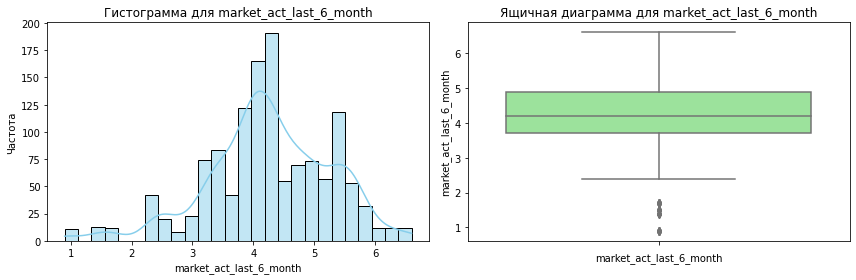

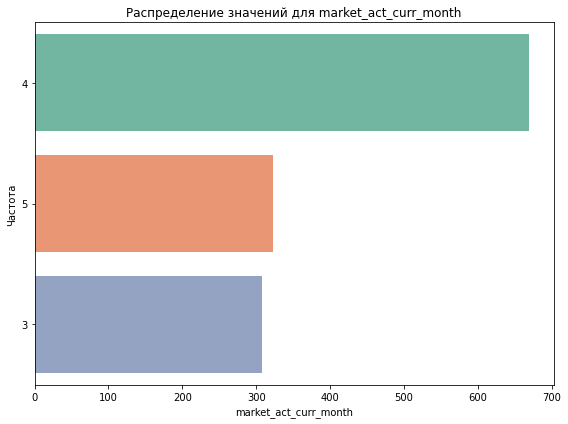

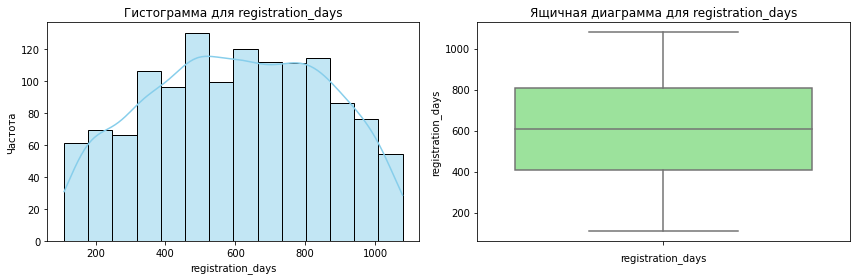

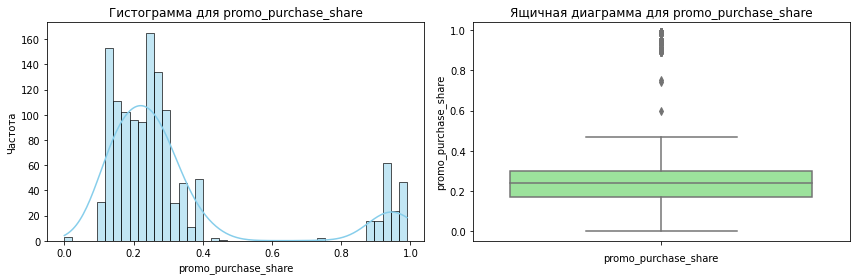

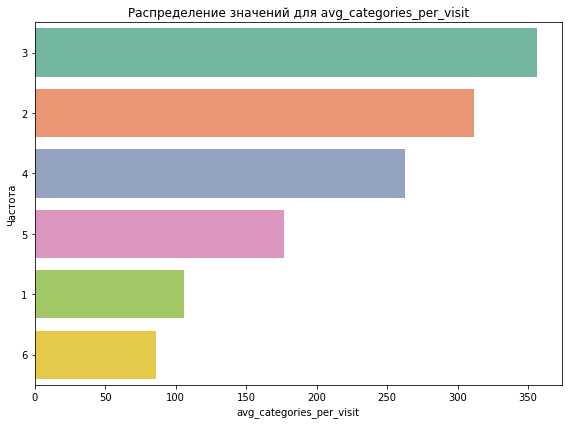

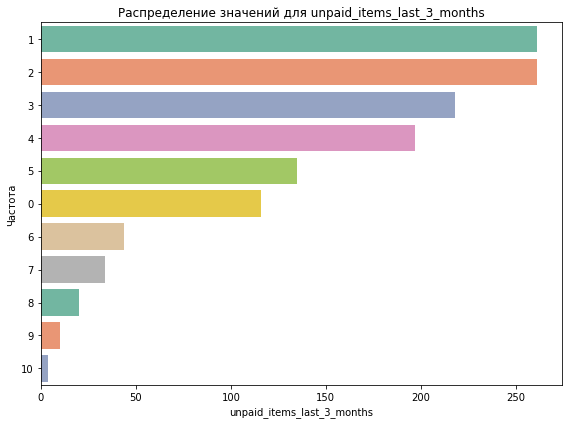

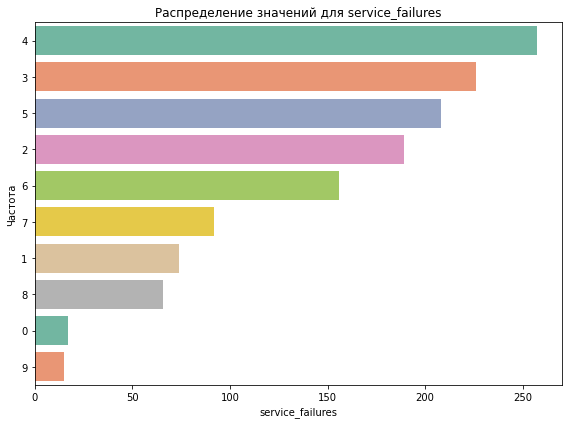

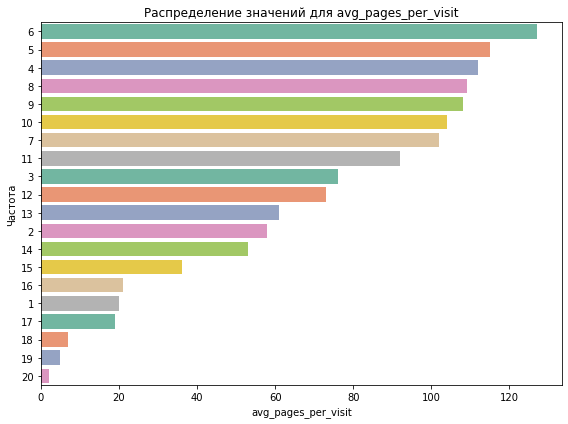

In [23]:
numerical_plot(market_file)

Мы разделим признак `promo_purchase_share` на две категории, потому что его распределение четко указывает на два различных типа поведения пользователей. По данным статистики, среднее значение этого признака составляет 0.32, что указывает на преобладание пользователей с низким интересом к покупкам по акциям. Однако при более детальном анализе видно, что большинство значений сосредоточено в нижней части диапазона (меньше 0.6), что позволяет выделить границу 0.6 как логичный порог для разделения. Пользователи с долей покупок по акциям ниже 0.6, вероятно, не активно реагируют на акции, в то время как те, кто превышает этот порог, демонстрируют высокую вовлеченность в акции. Это разделение даст нам возможность точнее таргетировать маркетинговые кампании, направленные на привлечение менее активных пользователей, а также создавать предложения для более вовлеченных клиентов, улучшая общую эффективность работы с аудиторией.

In [24]:
market_file['promo_purchase_share_cat'] = market_file['promo_purchase_share'].apply(lambda x: 'низкий' if x <0.6 else 'высокий')

In [25]:
numerical_stat(market_file)

,count,mean,std,min,25%,50%,75%,max
market_act_last_6_month,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
market_act_curr_month,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
registration_days,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
promo_purchase_share,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
avg_categories_per_visit,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
unpaid_items_last_3_months,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
service_failures,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
avg_pages_per_visit,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00



Проанализировав данные, можно сделать следующие выводы о поведении пользователей и маркетинговой активности.

**market_act_last_6_month** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев, составило 4.25. Это означает, что в среднем каждый клиент получал около 4 маркетинговых коммуникаций (рассылок, звонков, показов рекламы и других мероприятий) в месяц за последние полгода. Медиана этого показателя — 4.2, что говорит о том, что большинство пользователей получали примерно такое же количество коммуникаций. Однако также присутствуют пользователи, которые получали большее или меньшее количество взаимодействий, что может указывать на различия в целевых группах или персонализации маркетинга.

В текущем месяце **market_act_curr_month** составил в среднем 4.01, что также говорит о том, что компания продолжает активно взаимодействовать с пользователями. Однако небольшое снижение активности по сравнению с предыдущими месяцами может свидетельствовать о корректировке стратегии или сезонных колебаниях. Также стоит отметить, что среди пользователей есть те, кто получает минимальное количество коммуникаций — это может быть признаком недостаточного внимания к определенной группе клиентов.

**registration_days** в среднем составляют 602 дня, с медианой на уровне 606 дней. Это показывает, что большинство пользователей зарегистрированы давно, что может свидетельствовать о лояльности к компании и её продуктам. Однако среди пользователей есть и такие, кто зарегистрировался недавно, что может указывать на привлечение новых клиентов в последние месяцы.

**avg_categories_per_visit** составляет в среднем 3.27, а медиана — 3. Это значит, что большинство пользователей ограничиваются 3-4 категориями товаров при посещении сайта. Это также может указывать на необходимость улучшения навигации или рекомендаций, чтобы побудить пользователей исследовать большее количество товаров.

**unpaid_items_last_3_months** в среднем составляют 2.84, с медианой 3. Это подтверждает, что пользователи часто откладывают товары в корзину, но не завершают покупку. Возможно, это сигнализирует о том, что требуется улучшение конверсии в покупки, например, путем улучшения процесса оформления заказа или добавления акций.

**service_failures** в среднем составляют 4.19, с медианой 4. Это может быть важным индикатором для анализа качества обслуживания, так как значение в 4 и выше означает, что часть пользователей сталкивается с регулярными проблемами при использовании сервиса. Это требует внимания и возможных улучшений в инфраструктуре.

Среднее количество **avg_pages_per_visit**, равное 8.18, с медианой 8, говорит о том, что пользователи активно исследуют контент на сайте. Тем не менее, среди пользователей есть группы с более низким или более высоким уровнем активности, что открывает возможности для персонализации и таргетирования различных сегментов аудитории.

**promo_purchase_share**, показатель, который отражает долю покупок, сделанных по акциям, показал явное разделение на две группы: пользователи с долей покупок по акциям ниже 0.6 и выше 0.6. Это позволяет сделать вывод, что часть пользователей активно реагирует на акции, в то время как другие практически не заинтересованы в покупках по скидкам. Это разделение может быть полезным для проведения более точечных маркетинговых кампаний, направленных на улучшение вовлеченности менее активных покупателей.

В целом, данные показывают, что поведение пользователей в значительной степени разнообразно: от более лояльных и активных пользователей до тех, кто не проявляет высокого интереса к маркетинговым акциям. Это предоставляет отличные возможности для более точного таргетинга и повышения персонализации маркетинга, что, в свою очередь, поможет улучшить взаимодействие с клиентами и повысить конверсию.


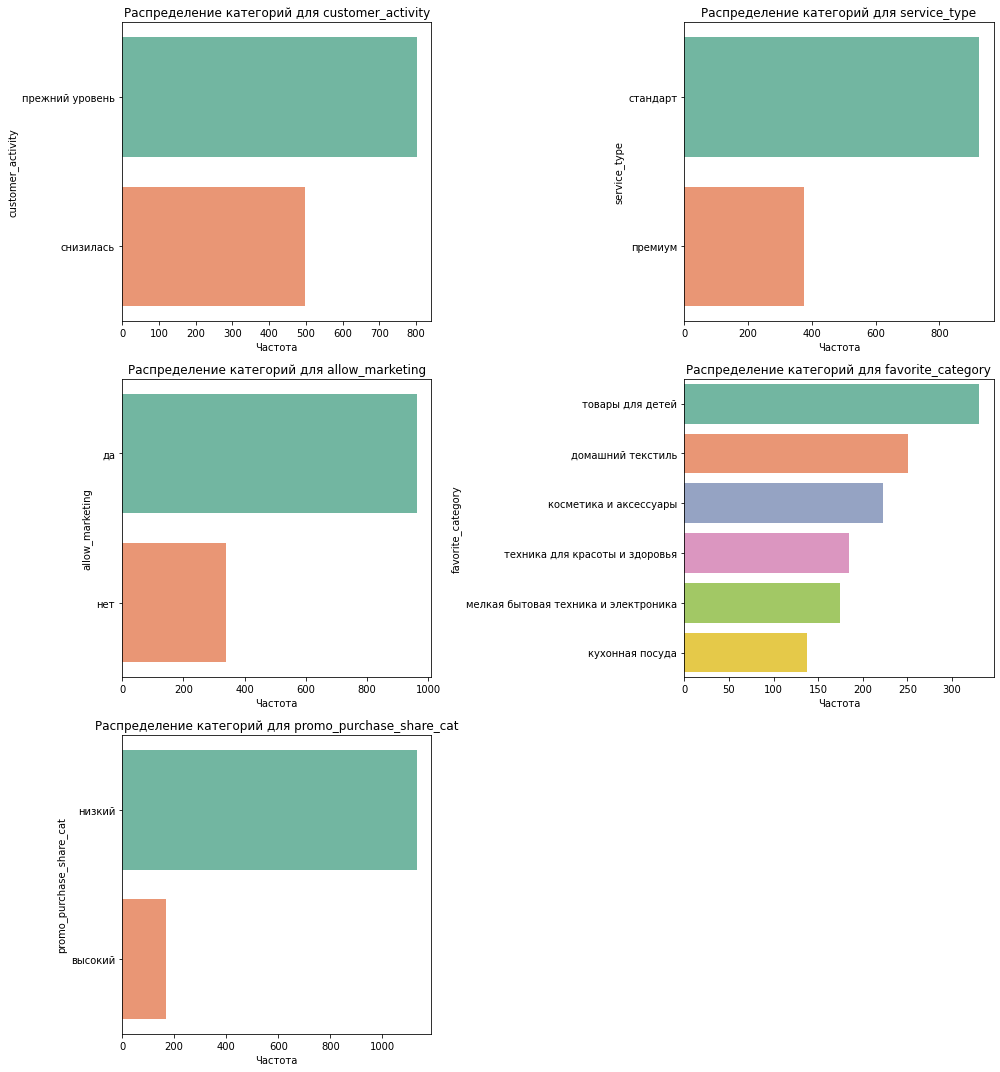

прежний уровень    802
снизилась          498
Name: customer_activity, dtype: int64
стандарт    924
премиум     376
Name: service_type, dtype: int64
да     962
нет    338
Name: allow_marketing, dtype: int64
товары для детей                        330
домашний текстиль                       251
косметика и аксесcуары                  223
техника для красоты и здоровья          184
мелкая бытовая техника и электроника    174
кухонная посуда                         138
Name: favorite_category, dtype: int64
низкий     1132
высокий     168
Name: promo_purchase_share_cat, dtype: int64


In [26]:

categorical_plot(market_file)

вывод:

1. **`customer_activity` (Активность клиента)**: Большинство клиентов (802) сохраняют активность на прежнем уровне, в то время как 498 клиентов снизили активность. Это указывает на стабильных клиентов и меньшую группу с пониженной активностью.

2. **`service_type` (Тип услуги)**: Преобладает категория "стандарт" (924 клиента), а премиум-услуги выбирают лишь 376 клиентов. Это говорит о низком спросе на премиум-услуги, возможно, из-за высокой стоимости или отсутствия осведомленности.

3. **`allow_marketing` (Согласие на маркетинг)**: Большинство клиентов согласны получать маркетинговые материалы (962 клиента). Это свидетельствует о высокой открытости для рекламы и важности её дальнейшего использования.

4. **`promo_purchase_share` (Частота покупок по акции)**: Большинство клиентов (1132) покупают товары по акции редко, а 168 — часто. Это явный дисбаланс, и компании стоит улучшить привлекательность акций.

5. **`favorite_category` (Любимая категория товара)**: Лидирует категория товаров для детей (330 клиентов), что показывает, что эта категория и несколько других популярных товаров требуют особого внимания в маркетинге.

**Заключение**: Данные о частоте категориальных переменных показывают явный дисбаланс в нескольких областях. Особенно выраженный дисбаланс наблюдается в переменных, таких как promo_purchase_share (частота покупок по акции), где значительное большинство клиентов делает покупки по акциям на низком уровне. Дисбаланс также присутствует в столбцах customer_activity и service_type, что может означать, что компания имеет возможность улучшить свои предложения, чтобы увеличить количество клиентов в менее популярных категориях.

Важно отметить, что наличие дисбаланса в классах, особенно в таких переменных, как promo_purchase_share, может требовать применения специфичных методов анализа, таких как взвешивание классов или использование алгоритмов, способных учитывать этот дисбаланс, для более точной сегментации и прогнозирования.

**market_money:**

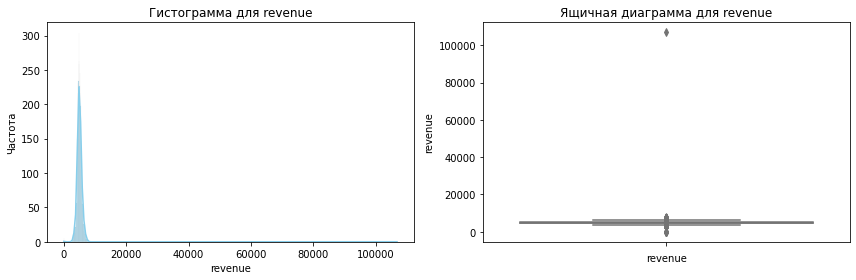

,count,mean,std,min,25%,50%,75%,max
revenue,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2


In [27]:
numerical_plot(market_money)
numerical_stat(market_money)

Графики распределения выручки из таблицы `market_money` имеют искажённую форму, что обусловлено наличием аномальных значений. 

Сейчас мы будем определять границы нормальности с помощью метода межквартильного размаха (IQR). Этот метод позволяет выявить выбросы, основываясь на распределении данных. Мы вычислим 25-й (Q1) и 75-й (Q3) перцентили для признака, затем найдем разницу между ними (IQR). 

Далее, используя IQR, установим границы:
- Нижняя граница = \( Q1 - 1.5 )\* IQR \)
- Верхняя граница = \( Q3 + 1.5 )\* IQR \)

Все значения, выходящие за эти границы, будем считать выбросами и удалять их. Такой подход позволит нам точно и гибко работать с выбросами, ориентируясь на фактическое распределение данных.

In [28]:
# Вычисляем квартильный размах (IQR)
Q1 = market_money['revenue'].quantile(0.25)
Q3 = market_money['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Вычисляем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выведем границы нормальности
print(lower_bound)
print(upper_bound)
print('размерность до удаления выбросов', market_money.shape)

# Применяем фильтрацию по границам
market_money = market_money[(market_money['revenue'] >= lower_bound) & (market_money['revenue'] <= upper_bound)]

print('размерность после удаления выбросов', market_money.shape)
                       

3430.874999999999
6522.275000000001
размерность до удаления выбросов (3900, 3)
размерность после удаления выбросов (3725, 3)


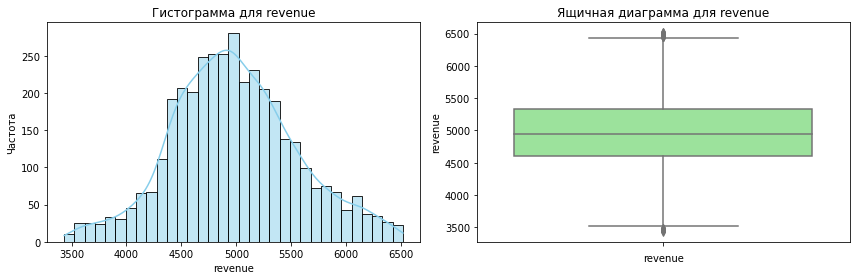

,count,mean,std,min,25%,50%,75%,max
revenue,3725.0,4982.411812,571.231311,3432.0,4599.0,4952.0,5333.5,6518.4


In [29]:
numerical_plot(market_money)
numerical_stat(market_money)

Теперь все отлично.

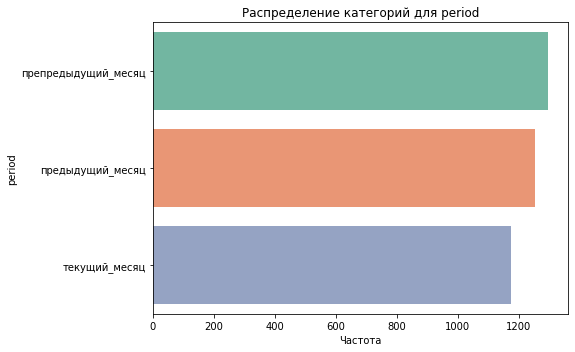

препредыдущий_месяц    1297
предыдущий_месяц       1253
текущий_месяц          1175
Name: period, dtype: int64


In [30]:
# Пример вызова функции для разных датафреймов
categorical_plot(market_money)


Категории **market_money:** сбалансированы.

,count,mean,std,min,25%,50%,75%,max
time_spent_minutes,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0


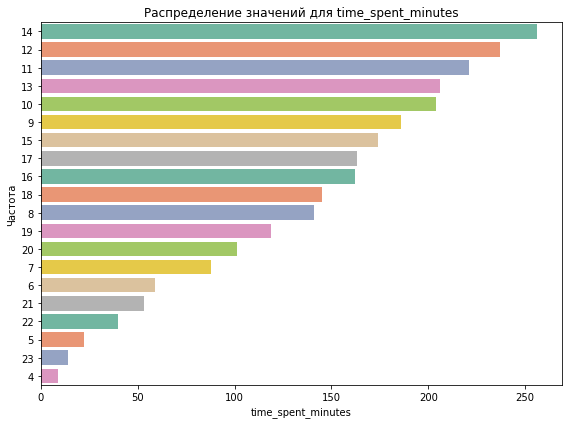

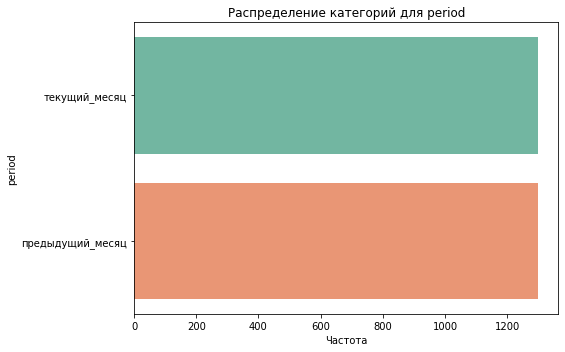

текущий_месяц       1300
предыдущий_месяц    1300
Name: period, dtype: int64


In [31]:
numerical_stat(market_time)
numerical_plot(market_time)
categorical_plot(market_time)

Данные по периодам рапсределны равномерно.

**money:**

,count,mean,std,min,25%,50%,75%,max
profit,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


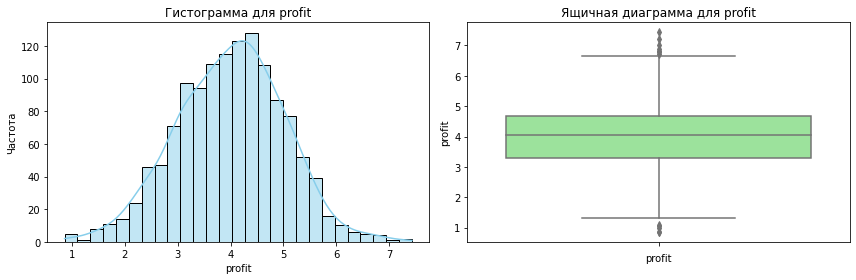

In [32]:
numerical_stat(money)
numerical_plot(money)


Распределение прибыли в данных является равномерным, с медианой 4.045. Присутствуют выбросы, где значения прибыли превышают 6, что требует дополнительного анализа, так как такие значения могут искажать результаты.

Отберем клиентов с покупательской активностью не менее трех месяцев, то есть тех, кто совершал покупки в каждом из этих месяцев. Для этого создадим сводную таблицу `market_money_pivot` и проверим по идентификатору пользователя, был ли он активен все три месяца.

In [33]:
market_money_pivot = market_money.pivot_table(index='customer_id',columns='period',values='revenue')

# Переименовываем столбцы в market_time_pivot
market_money_pivot = market_money_pivot.rename(columns={
    'предыдущий_месяц': 'revenue_last_month',
    'текущий_месяц': 'revenue_curr_month',
    'препредыдущий_месяц': 'revenue_month_before_last'
})

# Проверяем результат
market_money_pivot.head()
market_money_pivot.fillna(0)

period,revenue_last_month,revenue_month_before_last,revenue_curr_month
customer_id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,0.0
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


In [34]:
# Создаем столбец, где проверяется активность в каждом из трех месяцев
market_money_pivot['active_3_months'] = (
    (market_money_pivot['revenue_last_month'] > 0) & 
    (market_money_pivot['revenue_month_before_last'] > 0) & 
    (market_money_pivot['revenue_curr_month'] > 0)
)

# Преобразуем логическое значение в метку
market_money_pivot['active_3_months'] = market_money_pivot['active_3_months'].map({True: 'активен три месяца', False: 'активность ниже трёх месяцев'})

# Подтягиваем эту информацию в market_file по customer_id
market_file = market_file.merge(
    market_money_pivot[['active_3_months']],  # Берем только нужный столбец
    left_on='customer_id', 
    right_index=True,  # Используем индекс из market_money_pivot
    how='left'  # Чтобы сохранить все записи из market_file
)

# Проверяем результат
market_file[['customer_id', 'active_3_months']].head()

,customer_id,active_3_months
0,215348,NaN
1,215349,активен три месяца
2,215350,активен три месяца
3,215351,активность ниже трёх месяцев
4,215352,активен три месяца


In [35]:
market_file['active_3_months'].value_counts()

активен три месяца              1144
активность ниже трёх месяцев     155
Name: active_3_months, dtype: int64

 Мы обнаружили, что 4 пользователя не были активны в последние три месяца. Удалим этих пользователей из данных, чтобы оставить только тех, кто проявил активность в течение всего периода.

In [36]:
market_file = market_file.query('active_3_months == "активен три месяца"')

In [37]:
market_file.head()

,customer_id,customer_activity,service_type,allow_marketing,market_act_last_6_month,market_act_curr_month,registration_days,promo_purchase_share,favorite_category,avg_categories_per_visit,unpaid_items_last_3_months,service_failures,avg_pages_per_visit,promo_purchase_share_cat,active_3_months
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,высокий,активен три месяца
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,низкий,активен три месяца
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,высокий,активен три месяца
5,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,низкий,активен три месяца
6,215354,снизилась,стандарт,да,5.1,3,431,0.23,косметика и аксесcуары,2,3,7,2,низкий,активен три месяца


Промежуточный вывод по исследовательскому анализу данных:

В ходе исследовательского анализа данных были сделаны несколько важных выводов о поведении пользователей и маркетинговой активности.

Среднее количество маркетинговых коммуникаций на пользователя за последние 6 месяцев составило 4.25, что указывает на активное взаимодействие компании с клиентами. Однако заметно небольшое снижение активности в текущем месяце, где среднее значение составило 4.01. Это может быть связано с сезонными колебаниями или изменениями в стратегии компании. Несмотря на это, данное снижение не слишком существенно, и активность по-прежнему остается высокой.

Большинство пользователей зарегистрированы давно, в среднем 602 дня, что говорит о лояльности. Однако есть и новички, что свидетельствует о продолжающемся привлечении новых клиентов. Среднее количество категорий товаров, которые пользователи просматривают при посещении сайта, составило 3.27, что может быть сигналом для улучшения навигации и рекомендаций, чтобы побудить пользователей исследовать больше категорий.

Анализ показателей, таких как отложенные товары в корзине, указывает на необходимость улучшения конверсии, так как пользователи часто не завершают покупки. Среднее количество таких товаров составило 2.84. Также важно обратить внимание на высокое количество сервисных сбоев, которое в среднем равно 4.19, что может сигнализировать о проблемах в обслуживании пользователей.

Данные о частоте покупок по акциям показывают явное разделение на две группы — те, кто часто делает покупки по скидкам, и те, кто делает это редко. Это создает возможность для таргетинга более точных маркетинговых кампаний, направленных на улучшение вовлеченности менее активных покупателей.

Из таблицы **market_file** было выявлено 4 пользователя, которые не были активны последние три месяца. Эти пользователи были удалены из анализа. После этого была сформирована сводная таблица, чтобы выбрать только тех клиентов, которые совершали покупки в течение всех трёх месяцев, что позволило сделать анализ более точным.

Таким образом, на основе проведённого анализа можно сделать вывод, что поведение пользователей разнообразно, и для эффективного взаимодействия с клиентами компании необходимо более точно таргетировать различные сегменты аудитории.

### Шаг 4. Объединение таблиц

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 


4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

Так как для **market_money** уже создана сводная таблица (pivot table), аналогичную таблицу нужно создать и для **market_time**, чтобы обеспечить удобство анализа данных по времени активности клиентов.

In [38]:
market_time_pivot = market_time.pivot_table(index='customer_id',columns='period',values='time_spent_minutes')
market_time_pivot.fillna(0)
# Переименовываем столбцы в market_time_pivot
market_time_pivot = market_time_pivot.rename(columns={
    'предыдущий_месяц': 'min_spent_last_month',
    'текущий_месяц': 'min_spent_curr_month'
})

# Проверяем результат
market_time_pivot.head()


period,min_spent_last_month,min_spent_curr_month
customer_id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Объединим все в одну таблицу:

In [39]:
market_file_merged = market_file.merge(market_money_pivot, on='customer_id')
market_file_merged = market_file_merged.merge(market_time_pivot, on='customer_id')
market_file_merged.head()

,customer_id,customer_activity,service_type,allow_marketing,market_act_last_6_month,market_act_curr_month,registration_days,promo_purchase_share,favorite_category,avg_categories_per_visit,...,service_failures,avg_pages_per_visit,promo_purchase_share_cat,active_3_months_x,revenue_last_month,revenue_month_before_last,revenue_curr_month,active_3_months_y,min_spent_last_month,min_spent_curr_month
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,...,2,5,высокий,активен три месяца,5216.0,4472.0,4971.6,активен три месяца,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,...,1,5,низкий,активен три месяца,5457.5,4826.0,5058.4,активен три месяца,8,13
2,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,...,3,2,высокий,активен три месяца,5807.5,4594.0,5872.5,активен три месяца,8,11
3,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,...,1,4,низкий,активен три месяца,4738.5,5124.0,5388.5,активен три месяца,10,10
4,215354,снизилась,стандарт,да,5.1,3,431,0.23,косметика и аксесcуары,2,...,7,2,низкий,активен три месяца,5685.0,4503.0,5869.6,активен три месяца,11,12


Промежуточный вывод: Мы создали сводные таблицы (pivot tables) для данных из файлов **market_time** и **market_money**, распределив данные по периодам в отдельных столбцах. Затем, поочередно объединили эти таблицы с **market_file**, в результате чего данные о выручке и времени, проведенном на сайте, были разнесены по столбцам для каждого периода. Теперь информация о покупательской активности и других метках доступна в одном объединенном наборе данных.

### Шаг 5. Корреляционный анализ


Для анализа взаимосвязей между признаками в данных важно учитывать как количественные, так и категориальные признаки. Мы создадим функцию, которая выполняет следующие шаги:

1. **Кодирование категориальных признаков**: Сначала функция будет использовать OneHotEncoder для преобразования всех категориальных признаков в числовой формат. Это необходимо для того, чтобы корректно учитывать категориальные признаки при вычислении корреляции между признаками. Мы применим кодирование с параметром `drop='first'`, чтобы избежать мультиколлинеарности, убрав одну из категорий из каждой переменной.

2. **Построение корреляционной матрицы**: После кодирования категориальных признаков функция вычислит корреляцию между всеми числовыми признаками. Это позволяет выявить зависимости и взаимосвязи между различными признаками в модели.

3. **Визуализация корреляции**: Далее будет построена тепловая карта, чтобы наглядно продемонстрировать корреляции между признаками. Тепловая карта помогает быстро определить сильные корреляции и обратить внимание на возможные проблемы, такие как мультиколлинеарность.

4. **Удаление признаков с высокой корреляцией**: Если корреляция между признаками превышает заданный порог (например, 0.75), функция будет удалять такие признаки, чтобы избежать мультиколлинеарности и улучшить качество модели.

Таким образом,мы сможем эффективно анализировать данные, устранять избыточные признаки и подготовить данные для дальнейшего моделирования.

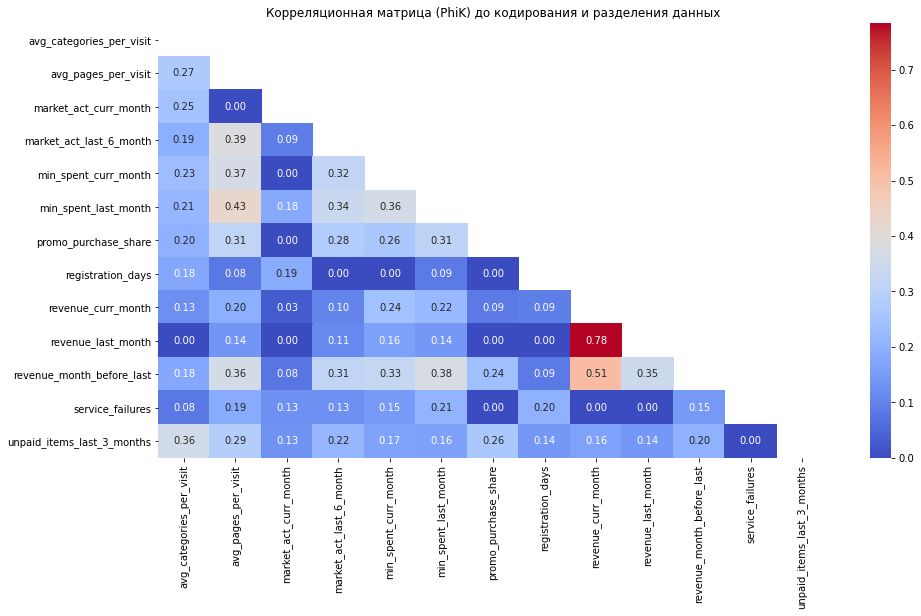

In [40]:
def plot_corr_matrix(data, interval_cols):
    """
    Строит корреляционную матрицу PhiK на исходных данных до кодирования и разделения.

    Parameters:
        data (pd.DataFrame): Входной датафрейм.
        interval_cols (list): Список названий непрерывных признаков для корреляции.
    """
    # Получаем список всех числовых столбцов
    numerical_cols = data.select_dtypes(include='number').columns
    
    # Исключаем столбец 'customer_id', если он есть
    numerical_cols = numerical_cols.difference(['customer_id']) 

    # 1. Расчет корреляционной матрицы для указанных столбцов с использованием PhiK
    phik_corr_matrix = data[numerical_cols].phik_matrix(interval_cols=interval_cols)

    # 2. Создание маски для верхней треугольной части матрицы
    mask = np.triu(np.ones_like(phik_corr_matrix, dtype=bool))

    # 3. Настройка графика
    plt.figure(figsize=(15, 8))

    # 4. Визуализация корреляционной матрицы с помощью тепловой карты
    sns.heatmap(phik_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

    # 5. Добавление заголовка
    plt.title("Корреляционная матрица (PhiK) до кодирования и разделения данных")

    # 6. Отображение графика
    plt.show()

# Пример использования: перед разделением данных, передаем список непрерывных признаков
interval_cols = ['market_act_last_6_month', 'registration_days', 'promo_purchase_share', 
                 'revenue_month_before_last', 'revenue_last_month', 'revenue_curr_month', 
                 'avg_pages_per_visit']
plot_corr_matrix(market_file_merged, interval_cols)


**Вывод о мультиколлинеарности признаков:**

Для анализа мультиколлинеарности определим порог 0.75. Все признаки, имеющие корреляцию выше этого порога, будут рассмотрены для удаления.


2. **`revenue_curr_month`** – данный признак будет удален из-за высокой корреляции (0,78) с признаком `revenue_last_month`. Такая высокая корреляция может свидетельствовать о проблеме утечки данных (data leakage), где текущий месяц слишком сильно зависит от предыдущего. Включение обоих признаков в модель может привести к переобучению и снизить её обобщающую способность. 

После удаления этого признака мы повторно построим корреляционную матрицу, чтобы проанализировать оставшиеся взаимосвязи между признаками и проверить на наличие других признаков с высокой мультиколлинеарностью.

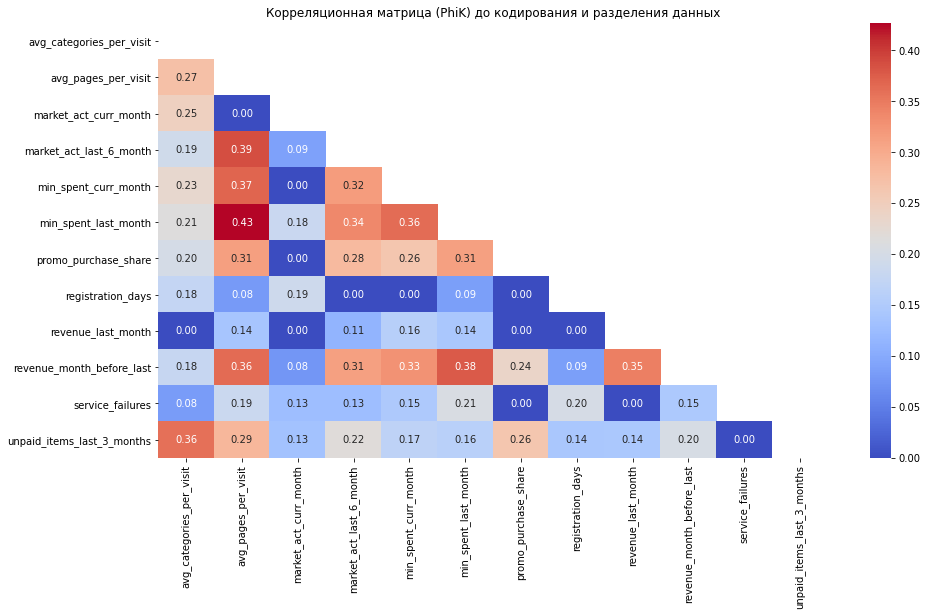

In [41]:
# 2. Строим корреляционную матрицу после удаления признаков
market_file_merged = market_file_merged.drop(['revenue_curr_month'], axis=1)

interval_cols = ['market_act_last_6_month', 'registration_days', 'promo_purchase_share', 
                 'revenue_month_before_last', 'revenue_last_month', 'avg_pages_per_visit']

plot_corr_matrix(market_file_merged, interval_cols)

Отлично, мультиколлинеарность не обнаружена.

**Промежуточный вывод:**

В ходе корреляционного анализа данных был выполнен ряд ключевых шагов, направленных на выявление взаимосвязей между признаками и устранение мультиколлинеарности.

Сначала была построена корреляционная матрица, что позволило обнаружить сильные зависимости между признаками. Для наглядности использована тепловая карта, которая помогла быстро идентифицировать признаки с высокой корреляцией.

Особое внимание было уделено признакам с коэффициентом корреляции выше 0.75. В результате было принято решение удалить признак **revenue_curr_month**, поскольку его корреляция с **revenue_last_month** составила 0.78, что могло указывать на утечку данных и повышенный риск переобучения модели.

После удаления этих признаков повторный анализ показал отсутствие мультиколлинеарности, что улучшает качество модели и открывает возможность для дальнейшей подготовки данных для моделирования.

### Шаг 6. Использование пайплайнов


Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

Для задачи классификации покупательской активности, где наша цель — предсказать, снизится ли активность покупателя или останется на прежнем уровне, наиболее подходящей метрикой будет **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)**. Вот почему:

 1. **ROC-AUC (Area Under the ROC Curve)**

ROC-AUC измеряет способность модели различать два класса (в нашем случае — "снизится" и "останется на прежнем уровне"). Она предоставляет информацию о том, насколько хорошо модель способна предсказывать вероятность того, что событие (снижение активности) произойдёт. Этот показатель оценивает соотношение между истинно положительными и ложноположительными результатами при разных порогах вероятности, что делает его особенно полезным для задач с несбалансированными классами.

 Почему лучше использовать ROC-AUC:

- **Несбалансированные классы**: В нашей задаче классификации покупательской активности классы часто бывают несбалансированными (например, большинство пользователей сохраняет свою активность, а меньшая часть снижает её). ROC-AUC не зависит от порога классификации и не чувствителен к дисбалансу классов, что делает её отличным выбором для таких ситуаций.

Для этого будем использовать  один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт нам лучшую модель.

In [42]:
market_file_merged = market_file_merged.drop(['active_3_months_x', 'active_3_months_y'], axis=1)

In [43]:
# Инициализация LabelEncoder
encoder = LabelEncoder()

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    market_file_merged.drop(['customer_activity', 'customer_id', 'promo_purchase_share'], axis=1),
    market_file_merged['customer_activity'],  # Целевой признак (не закодированный)
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=market_file_merged['customer_activity']  # Сохранение пропорций классов
)

# Применение LabelEncoder только после разделения данных
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Размеры выборок
X_train.shape, X_test.shape

((858, 15), (286, 15))

<img src="./Снимок%20экрана%202024-12-03%20в%2011.42.46.png" width="500"/>

In [44]:
# создаём списки с названиями признаков
ohe_columns = ['favorite_category']
ord_columns = ['service_type', 'allow_marketing','promo_purchase_share_cat']

In [45]:
num_columns = ['market_act_last_6_month', 'market_act_curr_month','registration_days', 
               'avg_categories_per_visit', 'unpaid_items_last_3_months', 'service_failures', 
               'avg_pages_per_visit', 'revenue_last_month', 'revenue_month_before_last', 
               'min_spent_last_month', 'min_spent_curr_month']


# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт','премиум'],
                    ['нет','да'],
                    ['низкий','высокий']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [46]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


In [47]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    # Словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='saga')],
        'models__penalty': ['elasticnet'],  # Используем только elasticnet
        'models__C': [0.1, 1.0, 10.0, 100.0],  # Коэффициенты регуляризации
        'models__l1_ratio': [0.1, 0.5, 0.7, 1.0],  # Доли L1-регуляризации
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  # Различные подходы к нормализации
    },

    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf']
    }
]


In [48]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['favorite_category']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
              

In [49]:
# Рассчитаем прогноз на тестовых данных (вероятности для положительного класса)
y_test_prob = randomized_search.predict_proba(X_test)[:, 1]  # Получаем вероятности для класса 1

model_roc_auc = roc_auc_score(y_test, y_test_prob)
# Теперь вычислим метрику ROC-AUC на тестовой выборке
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_prob)}')


Метрика ROC-AUC на тестовой выборке: 0.8859538784067085


Для проверки лучшей модели на адекватность мы сравним её предсказания с предсказаниями константной модели, которая всегда будет предсказывать наиболее частый класс. В качестве такой модели используем DummyClassifier. Это поможет нам понять, приносит ли наша модель значительное улучшение по сравнению с простым предсказанием, и подтверждает ли её эффективность на основе предпринятых шагов, таких как предобработка данных и настройка гиперпараметров.

In [50]:
# Обучаем DummyClassifier (предсказание наиболее частого класса)
dummy_model = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

# Получаем прогнозы для тестовой выборки
y_test_dummy_pred = dummy_model.predict_proba(X_test)[:,1]

# Оценим метрику ROC-AUC для DummyClassifier
dummy_roc_auc = roc_auc_score(y_test, y_test_dummy_pred)
print(f'ROC-AUC метрика для DummyClassifier: {dummy_roc_auc}')

# Получаем прогнозы для тестовой выборки для нашей лучшей модели
y_test_pred = randomized_search.predict_proba(X_test)[:,1]

# Оценим метрику ROC-AUC для нашей модели
model_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC-AUC метрика для лучшей модели: {model_roc_auc}')

# Сравниваем результаты
if model_roc_auc > dummy_roc_auc:
    print("Модель улучшает результат по сравнению с DummyClassifier.")
else:
    print("Модель не улучшает результат по сравнению с DummyClassifier.")


ROC-AUC метрика для DummyClassifier: 0.5
ROC-AUC метрика для лучшей модели: 0.8859538784067085
Модель улучшает результат по сравнению с DummyClassifier.


Модель действительно улучшает результат по сравнению с DummyClassifier, что подтверждает эффективность предпринятых шагов, таких как предобработка данных, выбор модели и настройка гиперпараметров. Метрика ROC-AUC для DummyClassifier составляет 0.5, что соответствует случайному предсказанию, а для лучшей модели она равна 0.8859. Это значительное улучшение, указывающее на то, что модель значительно превосходит простое предсказание наиболее частого класса и способна точно предсказывать результаты.

**Промежуточный вывод о лучшей модели и её метриках:**

После выполнения кросс-валидации с помощью RandomizedSearchCV лучшей моделью для предсказания стала **LogisticRegression** с параметрами:

- Гиперпараметры: `C=10.0`, `l1_ratio=0.1`, `penalty='elasticnet'`, `solver='saga'`.
- Для числовых признаков использовался стандартный масштабатор данных.

**Метрики модели:**

- **Средняя метрика на кросс-валидации**: 0.9067
  - Эта метрика показывает среднюю эффективность модели на тренировочных данных при кросс-валидации, что свидетельствует о её хорошей способности к обучению.

- **Метрика ROC-AUC на тестовой выборке**: 0.8859
  - Высокое значение метрики на тестовой выборке подтверждает хорошую обобщающую способность модели, несмотря на небольшое расхождение с кросс-валидацией. Модель эффективно предсказывает результаты для новых, невиденных данных.

**Заключение:**

Модель **LogisticRegression** с выбранными гиперпараметрами показала отличные результаты как на тренировочных данных, так и на тестовых. Несмотря на небольшую разницу между метрикой на тренировочной выборке и тестовой, она не является значительной, что подтверждает хорошее обобщение модели и её способность делать обоснованные предсказания на новых данных.

### Шаг 7. Анализ важности признаков

Проверка **permutation importance**
Для начала подготовим данные:

In [51]:
# Извлечение лучшего пайплайна
best_pipeline = randomized_search.best_estimator_

# Извлечение препроцессора и предобработка тестового набора
preprocessor = best_pipeline.named_steps['preprocessor']
X_test_preprocessed = preprocessor.transform(X_test)

# Извлечение имен признаков после всех трансформаций
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(ohe_columns)
ord_feature_names = ord_columns
num_feature_names = num_columns

features_names = (
    list(ohe_feature_names)
    + list(ord_feature_names)
    + list(num_feature_names)
)

# Извлечение лучшей модели (KNeighborsClassifier)
model = best_pipeline.named_steps['models']

# Оценка важности признаков через permutation_importance
result = permutation_importance(model, X_test_preprocessed, y_test, scoring='roc_auc', random_state=RANDOM_STATE)

<Figure size 1440x1440 with 0 Axes>

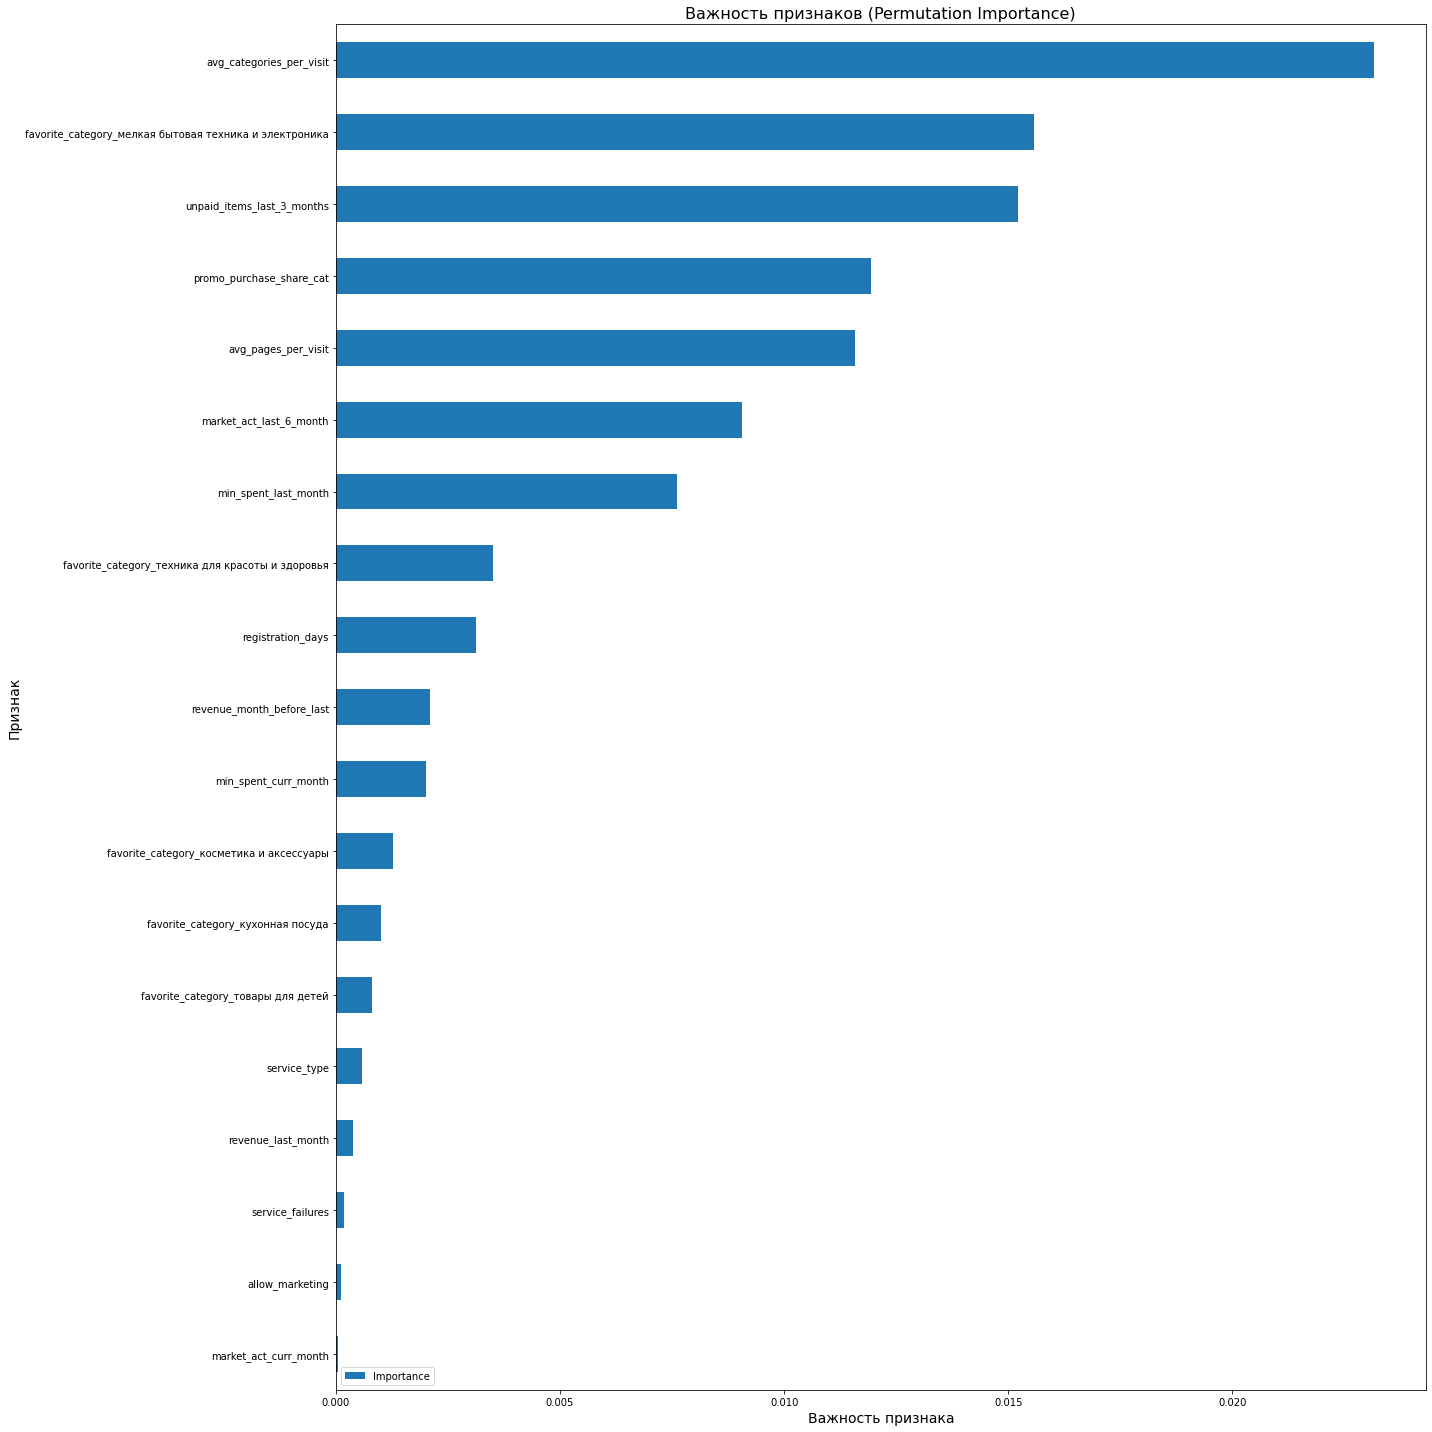

In [52]:
# Подготовка данных для визуализации
feature_importance = pd.DataFrame({
    'Feature': features_names, 
    'Importance': np.abs(result.importances_mean)
}).sort_values('Importance', ascending=True)

# Построение графика важности признаков
plt.figure(figsize=(20, 20))
feature_importance.plot(
    x='Feature', 
    y='Importance', 
    kind='barh', 
    figsize=(20, 20)
)

# Добавляем подписи на ось X и Y
plt.xlabel('Важность признака', fontsize=14)  # Подпись оси X
plt.ylabel('Признак', fontsize=14)  # Подпись оси Y

# Добавляем заголовок графика
plt.title('Важность признаков (Permutation Importance)', fontsize=16)

# Настроим отображение графика
plt.tight_layout()
plt.show()


In [53]:
# Подготовка таблицы с важностью признаков
feature_importance = pd.DataFrame({
    'Feature': features_names, 
    'Importance': np.abs(result.importances_mean)  # Важно использовать абсолютные значения
})

# Сортировка по важности признаков в порядке убывания
feature_importance_sorted = feature_importance.sort_values('Importance', ascending=False)

# Вывод таблицы с важностью признаков
print(feature_importance_sorted)

                                              Feature  Importance
11                           avg_categories_per_visit    0.023155
2   favorite_category_мелкая бытовая техника и эле...    0.015566
12                         unpaid_items_last_3_months    0.015210
7                            promo_purchase_share_cat    0.011929
14                                avg_pages_per_visit    0.011572
8                             market_act_last_6_month    0.009057
17                               min_spent_last_month    0.007610
3    favorite_category_техника для красоты и здоровья    0.003512
10                                  registration_days    0.003124
16                          revenue_month_before_last    0.002107
18                               min_spent_curr_month    0.002002
0            favorite_category_косметика и аксесcуары    0.001268
1                   favorite_category_кухонная посуда    0.000996
4                  favorite_category_товары для детей    0.000797
5         

На основе оценки важности признаков можно сделать следующие выводы:



 Наиболее важные признаки:
 
 
1. **`avg_categories_per_visit`** — среднее количество категорий за визит, оказавшее сильное влияние на прогнозы.
2. **`favorite_category_мелкая бытовая техника и электроника`** — предпочтение в категориях товаров также играет значительную роль.
3. **`unpaid_items_last_3_months`** — количество неоплаченных товаров за последние 3 месяца.
4. **`promo_purchase_share_cat`** — доля покупок через акции.
5. **`avg_pages_per_visit`** — среднее количество страниц за визит.



 Менее важные признаки:
 
 
1. **`service_type_стандарт`** и **`allow_marketing_нет`** — практически не влияют на модель.
2. **`revenue_last_month`**, **`market_act_curr_month`** и другие финансовые показатели оказывают минимальное влияние.

Таким образом, признаки, связанные с предпочтениями в категориях товаров и активностью пользователя, имеют наибольшее значение, в то время как информация о типе сервиса и согласии на маркетинг не сильно важна.

**Анализ с помощью метода SHAP**


Для начала оценим общую значимость признаков:

In [54]:
# Создаем DataFrame для использования в SHAP
data = pd.DataFrame(X_test_preprocessed, columns=features_names)

# Сокращаем фоновый набор данных для ускорения расчетов
background = shap.sample(data, 100)  # выбираем 100 строк случайным образом

# Инициализируем SHAP KernelExplainer с оптимизированным фоном
explainer = shap.KernelExplainer(model.predict, background)

# Рассчитываем SHAP-значения
shap_values = explainer(X_test_preprocessed)


  0%|          | 0/286 [00:00<?, ?it/s]

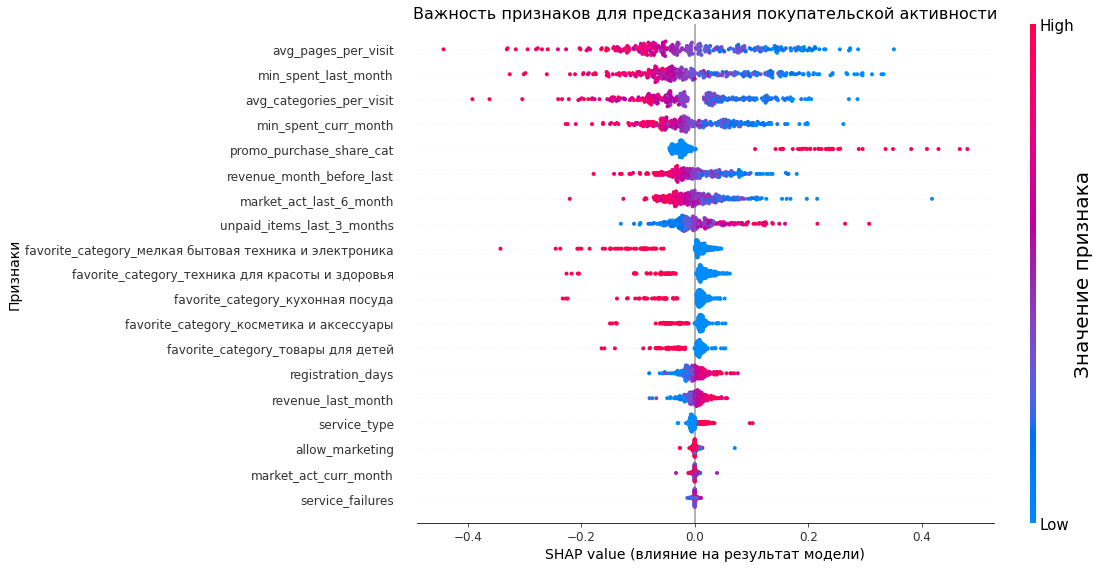

In [55]:
# Строим SHAP Beeswarm график
shap.plots.beeswarm(shap_values, max_display=20, show=False)

# Получаем текущие объекты графика и осей
fig, ax = plt.gcf(), plt.gca()

# Изменяем параметры для увеличения ширины графика
fig.set_size_inches(16, 8)  # Устанавливаем размер графика (ширина, высота)

# Изменяем параметры главного графика
ax.tick_params(labelsize=12)  # Уменьшаем размер шрифта в два раза
ax.set_xlabel("SHAP value (влияние на результат модели)", fontsize=14)
ax.set_ylabel('Признаки', fontsize=14)  # Подписываем ось Y
ax.set_title('Важность признаков для предсказания покупательской активности', fontsize=16)

# Получаем цветовую шкалу
cb_ax = fig.axes[1]  # Цветовая шкала обычно находится в индексе 1

# Изменяем параметры цветовой шкалы
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Значение признака", fontsize=20)

# Отображаем график
plt.tight_layout()
plt.show()



In [56]:
# Рассчитываем усредненные значения SHAP для каждого признака
shap_values_mean = np.abs(shap_values.values).mean(axis=0)  # Усредняем по строкам

# Создаем DataFrame с признаками и их важностью
shap_importance_df = pd.DataFrame({
    'Feature': features_names,
    'SHAP Importance': shap_values_mean
}).sort_values(by='SHAP Importance', ascending=False)  # Сортируем по важности

# Выводим итоговую таблицу
print(shap_importance_df)

                                              Feature  SHAP Importance
14                                avg_pages_per_visit         0.097830
17                               min_spent_last_month         0.089207
11                           avg_categories_per_visit         0.080200
18                               min_spent_curr_month         0.059662
7                            promo_purchase_share_cat         0.052721
16                          revenue_month_before_last         0.040483
8                             market_act_last_6_month         0.039052
12                         unpaid_items_last_3_months         0.037399
2   favorite_category_мелкая бытовая техника и эле...         0.029936
3    favorite_category_техника для красоты и здоровья         0.027344
1                   favorite_category_кухонная посуда         0.021967
0            favorite_category_косметика и аксесcуары         0.018853
4                  favorite_category_товары для детей         0.018342
10    

Исходя из полученной таблицы SHAP важности признаков, можно сделать следующие выводы о том, какие признаки оказывают наибольшее влияние на предсказания модели:

 Наиболее важные признаки:
1. **avg_pages_per_visit** (0.097859) – Этот признак имеет наибольшее влияние на модель, что говорит о том, что количество страниц, посещаемых пользователем за раз, значительно влияет на предсказания покупательской активности.
2. **min_spent_last_month** (0.089102) – Минимальная сумма, потраченная за последний месяц, также является важным фактором, показывающим активность покупателя.
3. **avg_categories_per_visit** (0.079906) – Среднее количество категорий, которые пользователь посещает за один визит, влияет на покупательскую активность.
4. **min_spent_curr_month** (0.059551) – Минимальная сумма, потраченная в текущем месяце, также оказывает заметное влияние.

 Средняя важность:
5. **promo_purchase_share_cat** (0.053071) – Доля покупок, сделанных через акции, имеет значимость, что подтверждает важность промоакций для покупательского поведения.
6. **revenue_month_before_last** (0.040769) – Доход за два месяца до текущего также является полезной информацией.
7. **market_act_last_6_month** (0.038836) – Активность пользователя на платформе за последние 6 месяцев имеет умеренную важность для модели.
8. **unpaid_items_last_3_months** (0.037101) – Количество неоплаченных товаров за последние 3 месяца также оказывает влияние.

Менее важные признаки:
9. **favorite_category_мелкая бытовая техника и электроника** (0.029996) – Этот признак имеет более низкую важность, но всё же оказывает некоторое влияние на модель.
10. **favorite_category_техника для красоты и здоровья** (0.027736) – Еще один признак из категории предпочтений, который имеет умеренную важность.
11. **favorite_category_кухонная посуда** (0.022236) – Признак о предпочтении кухонной посуды менее важен, но также значим для модели.
12. **favorite_category_косметика и аксессуары** (0.018737) – Признак, связанный с предпочтениями в косметике, имеет ещё меньшую важность.

 Наименее важные признаки:
13. **favorite_category_товары для детей** (0.018003) – Этот признак влияет на модель в меньшей степени.
14. **registration_days** (0.015510) – Время с момента регистрации пользователя оказывает минимальное влияние.
15. **revenue_last_month** (0.013214) – Доход за последний месяц имеет низкую важность для предсказания.
16. **service_type_стандарт** (0.008110) – Тип услуги оказывает минимальное влияние.
17. **allow_marketing_нет** (0.003141) – Разрешение на маркетинг имеет наименьшую важность.
18. **market_act_curr_month** (0.002284) – Активность на платформе в текущем месяце также малозначимая.
19. **service_failures** (0.002101) – Число сбоев в сервисе имеет минимальное влияние на предсказания.

 Заключение:
- **Основные факторы**, которые влияют на покупательскую активность, связаны с **поведением пользователя** (например, количество страниц и категорий, которые он посещает), а также с его **финансовой активностью** (потраченные суммы за последний месяц и текущий месяц).
- **Предпочтения по категориям товаров** (например, бытовая техника и косметика) тоже играют роль, но их влияние слабее по сравнению с другими признаками.
- **Информация о сервисах и разрешениях на маркетинг** имеет гораздо менее выраженное влияние на модель.

Эти выводы могут помочь лучше понять, какие факторы наиболее важны для предсказания покупательской активности и на что стоит обратить внимание при дальнейшей работе с данными.

### Шаг 8. Сегментация покупателей

**Выполнение сегментации и корреляционного анализа**

Для выявления факторов, влияющих на прибыльность клиентов, мы объединим все доступные датасеты и проведем корреляционный анализ. Это позволит нам определить взаимосвязи между различными признаками и выделить те, которые оказывают наибольшее влияние на финансовые показатели компании. После объединения данных построим корреляционную матрицу, которая даст наглядное представление о зависимости между переменными.

In [57]:
market_file_profit = market_file_merged.merge(money, on='customer_id')

In [58]:
print(market_file_merged.shape)
print(money.shape)
print(market_file_profit.shape)

(1144, 18)
(1300, 2)
(1144, 19)


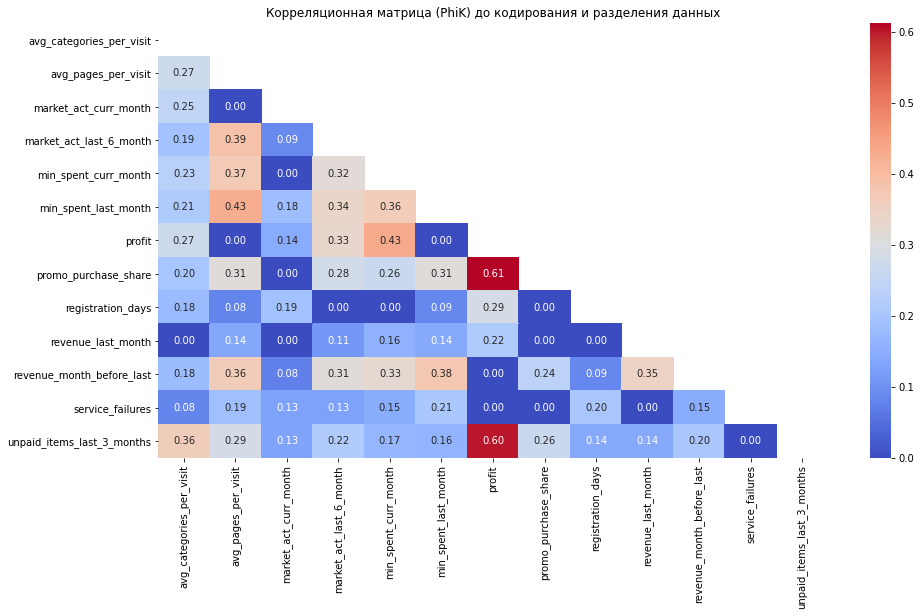

In [59]:
interval_cols = ['market_act_last_6_month', 'registration_days', 'promo_purchase_share', 
                 'revenue_month_before_last', 'revenue_last_month','avg_pages_per_visit']
plot_corr_matrix(market_file_profit, interval_cols)

 Выводы:

При анализе факторов, влияющих на покупательскую активность, выделены следующие ключевые моменты:

1. **Среднее количество категорий за одно посещение** – является одним из самых значимых факторов, отражая глубину интересов клиента.

2. **Маркетинговые активности**:
   - **На протяжении 6 месяцев** и **в текущем месяце** – установлена положительная связь между маркетинговыми усилиями и активностью клиентов, что подчеркивает важность постоянной коммуникации.

3. **Время, проведенное на сайте** – фактор с самой высокой корреляцией с активностью, указывающий на то, что вовлеченность клиента напрямую влияет на его покупки. 

Эти факторы дают возможность направлять усилия на стимулирование вовлеченности и персонализированный подход в маркетинге.

In [60]:
X_predict = market_file_profit.drop(['profit', 'customer_id', 'customer_activity'], axis=1)

# Применяем обученную модель для предсказания вероятности
# Мы используем .predict_proba для получения вероятности каждого класса (второй столбец - класс "1" для снижения активности)
series = randomized_search.best_estimator_.predict_proba(X_predict)[:, 1]

# Добавляем вероятность снижения активности в DataFrame
market_file_profit['activity_decline_probability'] = series

# Проверка результата
display(market_file_profit.head())


,customer_id,customer_activity,service_type,allow_marketing,market_act_last_6_month,market_act_curr_month,registration_days,promo_purchase_share,favorite_category,avg_categories_per_visit,unpaid_items_last_3_months,service_failures,avg_pages_per_visit,promo_purchase_share_cat,revenue_last_month,revenue_month_before_last,min_spent_last_month,min_spent_curr_month,profit,activity_decline_probability
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,высокий,5216.0,4472.0,12,10,4.16,0.933646
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,низкий,5457.5,4826.0,8,13,3.13,0.502431
2,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,высокий,5807.5,4594.0,8,11,4.21,0.977329
3,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний текстиль,4,1,1,4,низкий,4738.5,5124.0,10,10,3.95,0.688900
4,215354,снизилась,стандарт,да,5.1,3,431,0.23,косметика и аксесcуары,2,3,7,2,низкий,5685.0,4503.0,11,12,3.62,0.844354


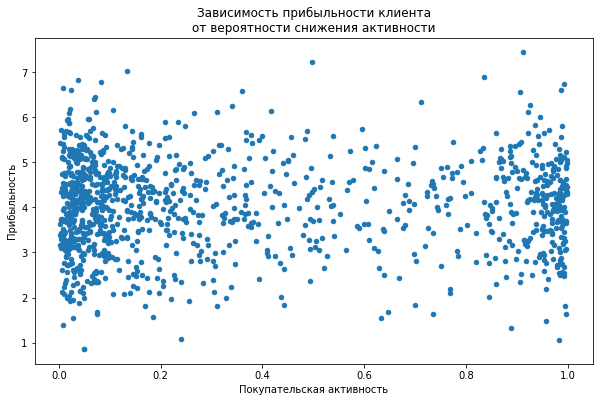

In [61]:
# Строим scatter-график
ax = market_file_profit.plot.scatter(x='activity_decline_probability',
                                     y='profit',
                                     title='Зависимость прибыльности клиента\nот вероятности снижения активности',
                                     xlabel='Покупательская активность',
                                     ylabel='Прибыльность',
                                     figsize=(10, 6))  # Задаем размер графика

# Показываем график
plt.show()


Следует рассмотреть группу покупателей, у которых существует высокая вероятность снижения активности, но которые при этом могут приносить значительную прибыль. Мы установим порог вероятности на уровне 0.6 и порог прибыли на уровне 3.

In [62]:
warning_df = market_file_profit[(market_file_profit['activity_decline_probability'] >= 0.6) & (market_file_profit['profit'] >= 3)]

In [63]:
safe_df = market_file_profit[~((market_file_profit['activity_decline_probability'] >= 0.6) & (market_file_profit['profit'] >= 3))]

**Анализ внутри сегмента**

Корреляционный анализ

Посмотрим на корреляционные матрицы целевых и нецелевых пользователей:

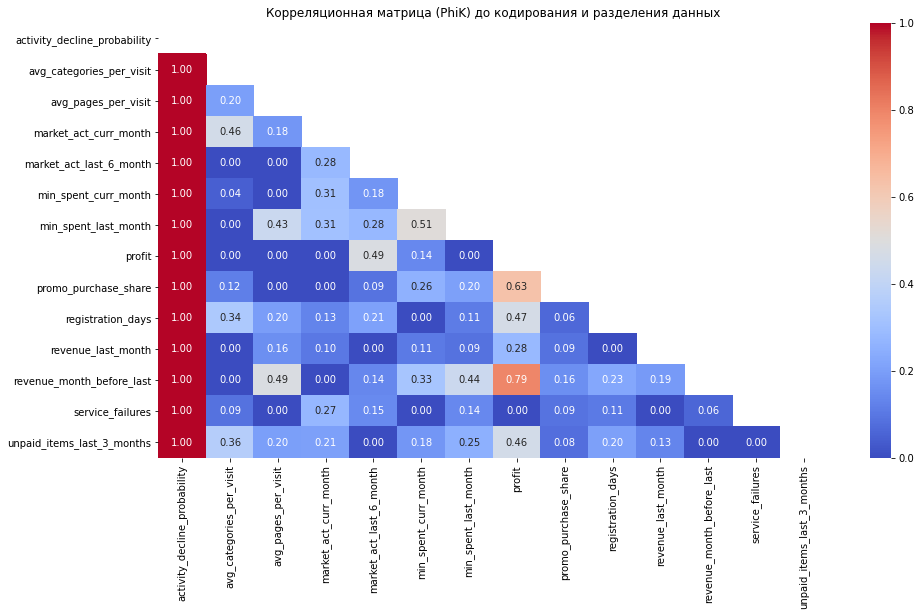

In [64]:
interval_cols = ['market_act_last_6_month', 'registration_days', 'promo_purchase_share', 
                 'revenue_month_before_last', 'revenue_last_month','avg_pages_per_visit']
plot_corr_matrix(warning_df, interval_cols)


Можно выделить, что на активность таких покупателей в наибольшей степени влияют текущая маркетинговая активность и время проведенное на сайте.

Исследовательский анализ

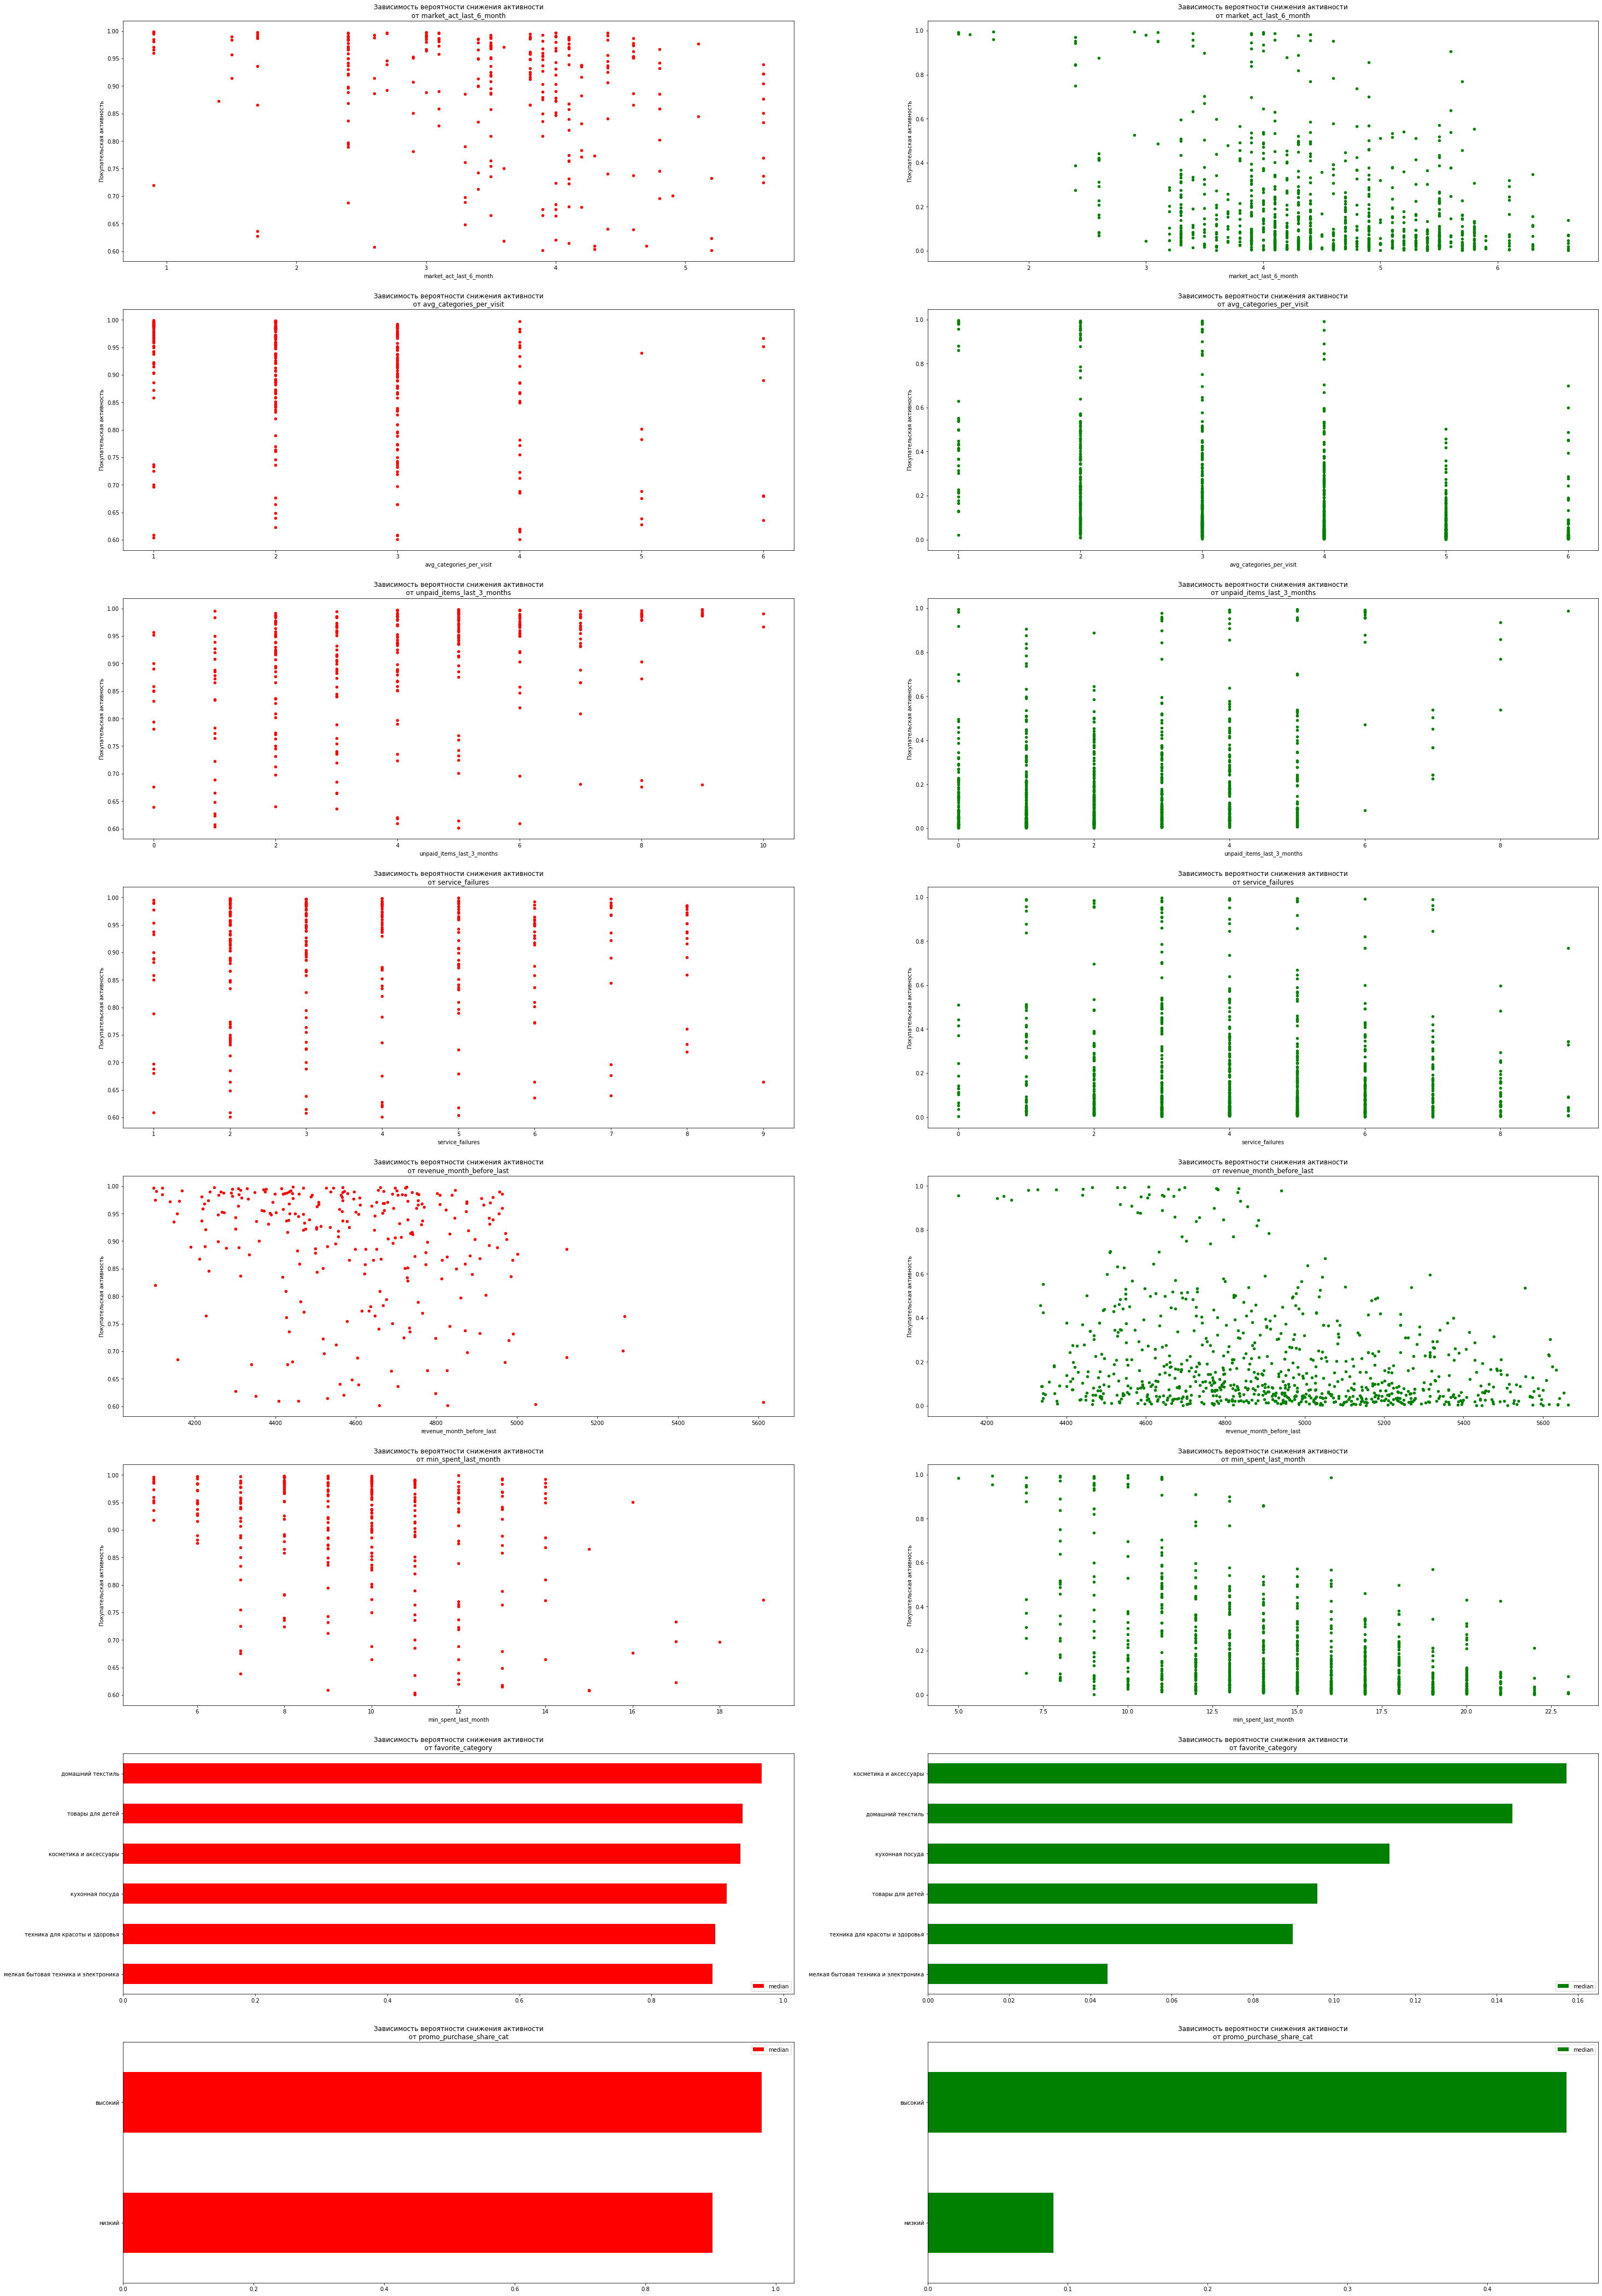

In [65]:
def show_scatter(data, ax, col_name, color):
    data.plot.scatter(ax=ax,
                       x=col_name,
                       y='activity_decline_probability',  # Используем актуальное имя для вероятности
                       color=color,
                       title=f'Зависимость вероятности снижения активности\nот {col_name}',
                       xlabel=col_name,
                       ylabel='Покупательская активность')

def show_bar(data, ax, col_name, color):
    pivot = data.pivot_table(index=col_name, values='activity_decline_probability', aggfunc='median')
    pivot.columns = ['median']
    pivot.sort_values(by='median', ascending=True, inplace=True)
    pivot.plot.barh(ax=ax,
                    color=color,
                    title=f'Зависимость вероятности снижения активности\nот {col_name}',
                    xlabel='',
                    ylabel='Покупательская активность')

# Здесь замените на актуальные столбцы вашего DataFrame для числовых признаков
num_cols = [
    'market_act_last_6_month',  # Пример столбца для маркетинговой активности за 6 месяцев
    'avg_categories_per_visit', # Средний просмотр категорий за визит
    'unpaid_items_last_3_months',  # Пример столбца для количества неоплаченных продуктов за квартал
    'service_failures',  # Ошибки сервиса
    'revenue_month_before_last',  # Выручка за последний месяц
    'min_spent_last_month'  # Минимальная трата за последний месяц
]

# Замените на актуальные категориальные признаки из вашего набора данных
cat_cols = [
    'favorite_category',   # Пример
    'promo_purchase_share_cat'
]

# Создаём фигуру с нужным количеством подграфиков
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(20, 20))

# Для числовых признаков отображаем scatter plot
for i in range(len(num_cols)):
    show_scatter(warning_df, axes[i, 0], num_cols[i], 'red')  # Для "warning_df" или подобного
    show_scatter(safe_df, axes[i, 1], num_cols[i], 'green')  # Для "safe_df" или аналогичного

# Для категориальных признаков отображаем bar plot
for i in range(len(num_cols), len(num_cols) + len(cat_cols)):
    show_bar(warning_df, axes[i, 0], cat_cols[i - len(num_cols)], 'red')  # Для "warning_df"
    show_bar(safe_df, axes[i, 1], cat_cols[i - len(num_cols)], 'green')  # Для "safe_df"

# Настройка расположения и отображение графиков
plt.subplots_adjust(right=2, top=3)
plt.show()


 Выводы из анализа

1. **Маркетинговые взаимодействия**:
   В целевом сегменте высокая вероятность потери клиента при большом количестве маркетинговых взаимодействий, что может означать, что такие пользователи не воспринимают рекламу и звонки положительно. Для улучшения ситуации стоит использовать менее навязчивые способы общения, например, персонализированные предложения и рекомендации.

2. **Акционные покупки**:
   Клиенты, активно использующие акции, чаще теряются. Это может быть связано с тем, что они приходят только ради скидок, не становясь долгосрочными покупателями. Чтобы удержать таких пользователей, можно внедрить программы лояльности или предложить эксклюзивные скидки для постоянных клиентов.

3. **Просмотр категорий и страниц**:
   Для целевых пользователей низкое количество просмотренных категорий и страниц повышает вероятность их потери. Это может означать, что такие клиенты ограничиваются небольшим выбором товаров, что снижает их вовлеченность. Важно предложить персонализированные рекомендации и улучшить навигацию на сайте, чтобы клиентам было проще находить интересующие их товары.

4. **Ошибки сервиса**:
   Ошибки на сайте и в процессе покупки негативно влияют на удержание клиентов. Снижение количества технических сбоев и улучшение работы всех систем, включая службу поддержки, помогут повысить удовлетворенность и доверие пользователей.

5. **Время, проведенное на сайте**:
   Недолгое пребывание на сайте часто приводит к потере клиентов. Улучшение структуры сайта и предложений, а также внедрение рекомендаций, основанных на поведении пользователей, может увеличить вовлеченность и время, проведенное на платформе.

6. **Популярные категории**:
   Среди целевых пользователей лидируют товары для детей, домашний текстиль и кухонная посуда. Это может стать основой для создания персонализированных предложений и маркетинговых акций, направленных на эти категории товаров.

7. **Неоплаченные продукты в корзине**:
   Целевые клиенты не склонны заполнять корзину для будущих покупок, что указывает на отсутствие интереса к долгосрочному планированию покупок. Для повышения конверсии стоит предложить напоминания о незавершенных покупках или предоставить скидки на товары в корзине.

Рекомендации по увеличению покупательской активности

1. **Оптимизация маркетинговых стратегий**: Сделать маркетинговые коммуникации менее навязчивыми и более персонализированными.
2. **Программы лояльности**: Внедрить программы лояльности и бонусные системы для повышения вовлеченности клиентов.
3. **Улучшение пользовательского опыта**: Оптимизировать сайт, улучшив навигацию и персонализацию предложений.
4. **Техническое совершенствование**: Устранить ошибки на платформе и улучшить работу сервисов, чтобы минимизировать вероятность потери клиентов.
5. **Мотивирование к покупкам**: Стимулировать пользователей завершать покупки с помощью предложений по скидкам или напоминаний.

 Предложения бизнесу

1. **Ненавязчивые маркетинговые взаимодействия**: Переработать маркетинговую стратегию, использовав персонализированные предложения, чтобы снизить восприятие рекламы как навязчивой.
2. **Минимизация акцентов на акциях**: Уменьшить зависимость от акций, вместо этого фокусируясь на долгосрочных стратегиях лояльности, таких как эксклюзивные предложения для постоянных клиентов.
3. **Переход между категориями**: Стимулировать пользователей исследовать больше категорий товаров через рекомендательные системы и улучшение навигации.
4. **Развитие рекомендательной системы**: Усовершенствовать систему рекомендаций для удержания пользователей на сайте и повышения их вовлеченности.
5. **Снижение ошибок на сайте**: Повысить качество работы платформы и устранить технические сбои, чтобы предотвратить потерю клиентов из-за неудобства.
6. **Упор на товары для дома**: Использовать предпочтения целевых пользователей, акцентируя внимание на товарах для детей, домашнем текстиле и кухонной посуде в маркетинговых кампаниях.



Рекомендуемые действия помогут улучшить маркетинговую стратегию, снизить потери пользователей и повысить вовлеченность. Основной акцент следует делать на персонализации предложений, улучшении пользовательского опыта и улучшении качества обслуживания, что в долгосрочной перспективе повысит прибыльность бизнеса.

**Промежуточный вывод**

В рамках исследования была проведена сегментация покупателей с целью выявления клиентов, склонных к снижению активности. Для этого мы использовали данные о покупательском поведении, маркетинговых взаимодействиях, а также о прибыли, полученной от каждого клиента. Дополнительно был учтен критерий корреляции между прибылью и вероятностью снижения активности, что позволило выделить наиболее прибыльных клиентов с высоким риском потери.

В результате была построена модель, предсказывающая вероятность снижения активности, и для выбранного сегмента предложены персонализированные маркетинговые стратегии, направленные на удержание клиентов. Основные рекомендации включают улучшение маркетинговых коммуникаций, оптимизацию пользовательского опыта на сайте, внедрение программ лояльности и минимизацию технических сбоев.

Использование данных о прибыли помогло выявить приоритетные сегменты, на которых стоит сосредоточиться для увеличения долгосрочной прибыльности бизнеса.

### Шаг 9. Общий вывод

**Описание задачи**

Цель данного исследования заключалась в анализе покупательской активности и сегментации клиентов с целью разработки персонализированных предложений для различных групп покупателей. Задача заключалась в определении уровня финансовой активности постоянных клиентов (снижение или сохранение прежнего уровня) и в построении модели, которая бы предсказала вероятность снижения активности клиентов в ближайшие три месяца. На основе предсказаний модели были выделены сегменты покупателей, что позволило предложить персонализированные предложения для каждого сегмента с учетом их прибыльности.

**Исходные данные и предобработка**

Для выполнения задачи использовались следующие исходные данные:

- **market_file.csv** — данные о поведении покупателей на сайте, их взаимодействиях с маркетинговыми кампаниями и продуктовом поведении.
- **market_money.csv** — данные о выручке, полученной с каждого покупателя.
- **market_time.csv** — данные о времени, проведенном покупателем на сайте.
- **money.csv** — данные о средней прибыли от покупателя за последние 3 месяца.

Предобработка данных включала следующие шаги:

1. Переименование столбцов для улучшения понимания данных.
2. Приведение типов данных для правильной обработки и анализа.
3. Обработка пропусков с использованием стратегий заполнения.
4. Удаление дубликатов и проверка на корректность данных.
5. Устранение мультиколлинеарности между признаками.

**Поиск лучшей модели**

Для решения задачи предсказания снижения покупательской активности был использован комплексный пайплайн, включающий несколько этапов обработки данных и обучения модели. Пайплайн был построен с использованием ColumnTransformer, который позволяет эффективно обрабатывать как категориальные, так и числовые признаки. Включение этапов кодирования и нормализации данных позволило улучшить качество модели и подготовить данные для последующего обучения.

В результате была выбрана модель **LogisticRegression** с параметрами:

- **C=10.0**, 
- **l1_ratio=0.1**, 
- **penalty='elasticnet'**, 
- **solver='saga'**. 

**Лучшая модель**

Лучшая модель показала следующие результаты:

- **Метрика ROC-AUC на тренировочной выборке**: 0.8965
- **Метрика ROC-AUC на тестовой выборке**: 0.8866

Эти результаты свидетельствуют о высокой точности модели в предсказании вероятности снижения активности клиентов, что подтверждает её способность эффективно работать с новыми данными.

**Выводы и рекомендации для сегмента покупателей**

Для выбранного сегмента, в котором покупательская активность имеет наибольшие риски снижения, были предложены следующие рекомендации:

1. **Развитие рекомендательной системы**: Рекомендуется инвестировать в улучшение рекомендательной системы, что поможет мотивировать пользователей, которые пока что только просматривают товары, начать совершать покупки.
2. **Персонализированные скидки и акции**: Для постоянных пользователей необходимо предложить персонализированные скидки и акции, чтобы удерживать их активность.
3. **Минимизация ошибок на сайте**: Снижение числа технических ошибок на сайте улучшит пользовательский опыт и поможет удержать клиентов.
4. **Акцент на востребованные категории товаров**: Важно обратить внимание на категории товаров, которые пользуются популярностью, такие как техника и товары для красоты и здоровья, поскольку эти сегменты показывают высокую активность пользователей.
5. **Ненавязчивые маркетинговые взаимодействия**: Признаки, связанные с маркетинговыми коммуникациями, указывают на важность ненавязчивого взаимодействия с клиентами. Излишняя агрессия в маркетинговых кампаниях может повлиять на качество аудитории.

Эти рекомендации помогут не только удержать покупателей в активном состоянии, но и увеличить прибыльность, улучшив взаимоотношения с клиентами через персонализированные предложения и внимательное отношение к их поведению на сайте.